# **IMPORT PACKAGE**

In [1]:
import pandas as pd
import datetime
import os

# **DATA DEFINITION**

Pada bagian ini, dipetakan keyword yang akan digunakan untuk proses scrapping (per lapangan usaha), berikut juga dengan batasan waktu dari artikel yang ingin diambil. Di Badan Pusat Statistik, terdapat 17 sektor lapangan usaha, meliputi:
1.	Pertanian, Kehutanan, dan Perikanan
2.	Pertambangan dan Penggalian
3.	Industri Pengolahan
4.	Pengadaan Listrik, Gas
5.	Pengadaan Air, Pengelolaan Sampah, Limbah dan Daur Ulang
6.	Konstruksi
7.	Perdagangan Besar dan Eceran, Reparasi Mobil dan Sepeda Motor
8.	Transportasi dan Pergudangan
9.	Penyediaan Akomodasi dan Makan Minum
10.	Informasi dan Komunikasi
11.	Jasa Keuangan dan Asuransi	
12.	Real Estat	
13.	Jasa Perusahaan
14.	Administrasi Pemerintahan, Pertahanan dan Jaminan Sosial Wajib
15.	Jasa Pendidikan
16.	Jasa Kesehatan dan Kegiatan Sosial
17.	Jasa lainnya

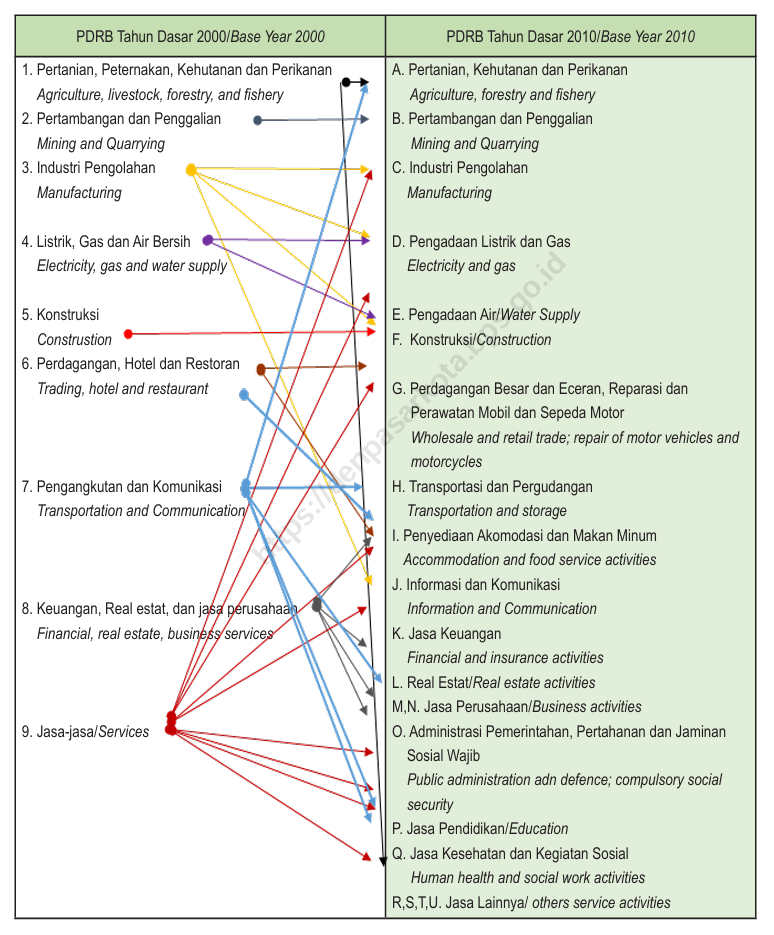

In [2]:
# Tentukan keywords dari masing-masing lapangan usaha
key_sektor = ['bandara','tol','terminal','kargo','gilimanuk','pelabuhan']

keywords_scrap = key_sektor

# Tentukan rentang tanggal
start_date = datetime.date(2024, 10, 1)
end_date = datetime.date(2024, 11, 12)

# **SCRAPPING, PRE-CLEANING, & EXPORT (Scrapping BaliPost Lama)**

## 1. BaliPost

Fungsi dan package untuk scrapping di balipost ada pada kode di chunk berikut \
Aktifkan kalau pencarian di balipost sudah berjalan normal (saat kode ini dibuat sangat lambat)

In [3]:
# import requests
# from bs4 import BeautifulSoup
# import datetime
# import pandas as pd

# # Fungsi untuk melakukan scraping dari BaliPost
# def scrape_balipost(keyword, start_date, end_date, max_results, max_pages):
#     """
#     Fungsi untuk melakukan scraping artikel dari situs BaliPost berdasarkan keyword dan rentang tanggal.

#     Args:
#     - keyword (str): Keyword pencarian.
#     - start_date (datetime.date): Tanggal awal.
#     - end_date (datetime.date): Tanggal akhir.
#     - max_results (int): Maksimum jumlah artikel yang diambil.
#     - max_pages (int): Maksimum jumlah halaman yang diambil.

#     Returns:
#     - results (list): Daftar artikel yang berisi judul, link, tanggal, keyword, dan isi.
#     """
#     results = []

#     # Mengganti spasi dengan tanda "+" untuk keyword yang lebih dari satu kata
#     search_keyword = keyword.replace(" ", "+")
#     base_url = f"https://www.balipost.com/search/{search_keyword}"
#     current_page = 1

#     while len(results) < max_results and current_page <= max_pages:
#         url = f"{base_url}/page/{current_page}" if current_page > 1 else base_url
#         print(f"Scraping halaman {current_page} dari URL: {url}")
#         response = requests.get(url)

#         if response.status_code != 200:
#             print(f"Error saat mengakses halaman {current_page}. Status code: {response.status_code}")
#             break

#         soup = BeautifulSoup(response.content, "html.parser")
#         articles = soup.find_all("div", class_="td_module_10 td_module_wrap td-animation-stack")

#         if not articles:
#             print(f"Tidak ada artikel di halaman {current_page}, berhenti scraping.")
#             break

#         for article in articles:
#             title_element = article.find("h3", class_="entry-title td-module-title")
#             if title_element:
#                 title = title_element.text.strip()
#                 link = article.find("a")["href"]

#                 date_element = article.find("time", class_="entry-date updated td-module-date")
#                 if date_element:
#                     date_str = date_element["datetime"][:10]
#                     date = datetime.datetime.strptime(date_str, "%Y-%m-%d").date()

#                     # Cek apakah tanggal artikel dalam rentang yang diinginkan
#                     if not (start_date <= date <= end_date):
#                         continue

#                 content_element = article.find("div", class_="td-excerpt")
#                 content = content_element.text.strip() if content_element else ""

#                 results.append({"title": title, "keyword": keyword, "source": "BaliPost", "link": link, "date": date, "content": content})
#                 if len(results) >= max_results:
#                     break

#         pagination = soup.find("a", class_="page", title=str(current_page + 1))
#         if pagination:
#             current_page += 1
#         else:
#             break

#     return results


Memulai proses scrapping berita

In [4]:
# # Step 4: Scraping untuk setiap keyword
# # Takes a LOOOOOOOOOOOONG time

# all_news = []

# for keyword in keywords_scrap:
#     print(f"\nMemulai scraping untuk keyword: {keyword}")
#     news = scrape_balipost(keyword, start_date, end_date, max_results=25, max_pages=3)

#     # Tampilkan jumlah artikel yang berhasil diekstrak untuk keyword ini
#     num_articles = len(news)
#     print(f"Jumlah artikel yang diekstrak untuk keyword '{keyword}': {num_articles}")

#     all_news.extend(news)

# # Step 5: Simpan hasil ke dalam file Excel
# berita_balipost = pd.DataFrame(all_news)
# berita_balipost

In [5]:
# # Import melalui kode ini kalau sudah ada raw data scrapping BaliPost yang terpisah dari proses scrapping diatas (hanya untuk BaliPost)
# berita_balipost = pd.read_excel("C:/Users/asus/OneDrive/BPS/Neraca/berita_sektor8_triwulan4_bali.xlsx")
# berita_balipost

Pre-cleaning \
Hasil Scrapping BaliPost harus difilter terlebih dahulu wilayah (dari isi konten) dan judulnya (kadang tidak sesuai dengan kata yang diinginkan) \
Contoh: Kata kunci --> Ikan || Judul ditemukan --> DicarIKAN, DijanjIKAN

In [6]:
# # Keyword to filter out
# keywords_filter = ["TABANAN","SINGARAJA","DENPASAR","MANGUPURA","AMLAPURA","SEMARAPURA","NEGARA","GIANYAR","BANGLI"]

# # Build the condition for multiple keywords
# pattern = '|'.join(keywords_filter)  # Create a pattern that matches any of the keywords

# # Filter out rows where 'Description' contains the keyword
# berita_balipost_2 = pd.DataFrame(berita_balipost[berita_balipost['content'].str.contains(pattern, case=False, na=False)])

# # Show the filtered DataFrame
# print(berita_balipost_2.shape)
# berita_balipost_2

In [7]:
# # Build the regular expression pattern with word boundaries
# pattern_1 = r'\b(' + '|'.join(keywords_scrap) + r')\b'  # Ensures "Ikan" is a whole word

# # Filter rows where 'Title' contains the keyword as a whole word (case insensitive)
# berita_balipost_3 = berita_balipost_2[berita_balipost_2['title'].str.contains(pattern_1, case=False, na=False)]

# # Show the filtered DataFrame
# print(berita_balipost_3.shape)
# berita_balipost_3

In [8]:
# # Remove Duplication
# berita_balipost_3 = berita_balipost_3.drop_duplicates(subset='title', keep='first')
# print(berita_balipost_3.shape)
# berita_balipost_3

## 2. DetikBali

In [9]:
import math
import requests
from bs4 import BeautifulSoup as bs
import pandas as pd

# Define web scraping functions
# Fungsi untuk menuju ke portal berita
def search_url(query, date_start, date_end, pages_num=1):
    url = f"https://www.detik.com/search/searchnews?query={query}&siteid=123&sortby=time&fromdatex={date_start}&todatex={date_end}&page={pages_num}&result_type=relevansi"
    
    print(url)
    response = requests.get(url)
    page = bs(response.content, "html.parser")

    return page

# Fungsi untuk menghitung jumlah artikel di halaman terakhir
def last_page_article_count(query, date_start, date_end, page_num):
    last_page = search_url(query, date_start, date_end, page_num)
    article_list = last_page.find("div", {"class": "list-content"})

    if article_list:
        articles = article_list.find_all('article', class_='list-content__item')           
    article_count = len(articles)
    
    return article_count

def news_search_results(query, date_start, date_end):
    page = search_url(query, date_start, date_end)
    
    pagination = page.find("div", {"class": "pagination"})
    if pagination:
        page_numbers = pagination.find_all('a', class_='pagination__item')
        if page_numbers:
            last_page_number = int(page_numbers[-2].text)

        # Menghitung jumlah artikel di halaman terakhir
        last_page_articles = last_page_article_count(query, date_start, date_end, last_page_number)

        # Menghitung jumlah artikel yang diperoleh
        num = (last_page_number - 1) * 10 + last_page_articles
    else:
        num = 0
        last_page_number = 1
    
    return num, last_page_number

# Fungsi untuk mendapatkan isi konten
def news_get_content(article_url):
    response = requests.get(article_url)
    content_page = bs(response.content, "html.parser")

    content_list = []
    multiple_page = content_page.find("div", {"class": "detail__multiple"})
    if multiple_page:
        multiple_page = [x.get("href") for x in multiple_page.find_all("a")][:-1]
        for page in multiple_page:
            response = requests.get(page)
            content_page = bs(response.content, "html.parser")
            content_list.extend([p.get_text() for p in content_page.find_all("p") if not p.get_text().startswith('\n\n\n\nHalaman\n\n') and
                                p.get_text() not in ['',
                                                    '[Gambas:Instagram]',
                                                    '[Gambas:Video 20detik]',
                                                    '\r\nADVERTISEMENT\r\n',
                                                    '\r\n    ADVERTISEMENT\r\n',
                                                    '\r\n    ADVERTISEMENT\r\n  ',
                                                    '\r\n   ADVERTISEMENT\r\n  ',
                                                    '\r\n   ADVERTISEMENT\r\n',
                                                    '\r\n        SCROLL TO RESUME CONTENT\r\n  ',
                                                    'Selengkapnya di halaman selanjutnya.',
                                                    '\n\t\t\t\t\tAyo share cerita pengalaman dan upload photo album travelingmu di sini.\n\n\t\t\t\t\t\t\t\t\t\t\tSilakan Daftar atau Masuk\n']])
    else:
        content_list.extend([p.get_text() for p in content_page.find_all("p")
                            if p.get_text() not in ['',
                                                    '[Gambas:Instagram]',
                                                    '[Gambas:Video 20detik]',
                                                    '\r\nADVERTISEMENT\r\n',
                                                    '\r\n    ADVERTISEMENT\r\n',
                                                    '\r\n    ADVERTISEMENT\r\n  ',
                                                    '\r\n   ADVERTISEMENT\r\n  ',
                                                    '\r\n   ADVERTISEMENT\r\n',
                                                    '\r\n        SCROLL TO RESUME CONTENT\r\n  ',
                                                    '\n\t\t\t\t\tAyo share cerita pengalaman dan upload photo album travelingmu di sini.\n\n\t\t\t\t\t\t\t\t\t\t\tSilakan Daftar atau Masuk\n']])

    content_list = '\n\n'.join(content_list)

    return content_list

# Fungsi untuk mengecek berita yang merupakan advertorial
def news_advertorial_check(article_url):
    response = requests.get(article_url)
    content_page = bs(response.content, "html.parser")

    author = content_page.find("meta", {"content": "Advertorial"})

    return bool(author)

# Fungsi untuk mencari artikel dengan output adalah jumlah artikel dan halaman terakhir
def search_articles(query, from_date, to_date, ads_article, article_content):
    results_num, last_page = news_search_results(query, from_date, to_date)
        
    print(f"Result num: {results_num}")
    print(f"Last page: {last_page}")

    return results_num, last_page

# Fungsi untuk memperoleh list artikel
def articles_list(query, from_date, to_date, ads_article, article_content, num_articles, last_page):
    article_lists = []
    pages = math.ceil(num_articles / 10)
    
    print("\nMemulai Scrapping dari DetikBali untuk keyword:", query)
    for i in range(1, pages + 1):
        print("Scrapping halaman", i, "dari URL: ")
        page = search_url(query, from_date, to_date, i)
        articles = page.find_all("article", class_="list-content__item")

        for article in articles:
            title = article.find("a", {"class": "media__link"}).get('dtr-ttl')
            category = article.find('h2', class_='media__subtitle').text.strip()
            publish_date = article.find('span', title=True).get('title')
            article_url = article.find("a", {"class": "media__link"}).get('href')
                
            # print(f"Title: {title}")
            # print(f"Category: {category}")
            # print(f"Publish Date: {publish_date}")
            # print(f"Article URL: {article_url}")

            if ads_article and news_advertorial_check(article_url):
                continue
            else:
                if article_content:
                    content = news_get_content(article_url)
                    if (
                        any(title in existing_article["title"] for existing_article in article_lists) or 
                        any(content in existing_article["content"] for existing_article in article_lists)
                    ):
                        continue
                    else:
                        article_lists.append({
                            "title": title,
                            "keyword": query,
                            "source": category,
                            "link": article_url,
                            "date": publish_date,
                            "content": content
                        })
                else:
                    if any(title in existing_article["title"] for existing_article in article_lists):
                        continue
                    else:
                        article_lists.append({
                            "title": title,
                            "keyword": query,
                            "link": article_url,
                            "date": publish_date
                        })
            if len(article_lists) == num_articles:
                break
        if len(article_lists) == num_articles:
            break
            
    print(f"Jumlah artikel dengan kata kunci {keyword}: {len(article_lists)} artikel.")
    data = article_lists
    return data

In [10]:
# Scraping untuk setiap keyword
all_news_detik = []

for keyword in keywords_scrap:
    search_keyword = keyword.replace(" ", "+")
    news = articles_list(search_keyword, start_date.strftime('%d/%m/%Y'), end_date.strftime('%d/%m/%Y'), False, True, 25, 5)
    all_news_detik.extend(news)

# Simpan hasil ke dalam file Excel
berita_detik = pd.DataFrame(all_news_detik) 
berita_detik


Memulai Scrapping dari DetikBali untuk keyword: bandara
Scrapping halaman 1 dari URL: 
https://www.detik.com/search/searchnews?query=bandara&siteid=123&sortby=time&fromdatex=01/10/2024&todatex=12/11/2024&page=1&result_type=relevansi
Scrapping halaman 2 dari URL: 
https://www.detik.com/search/searchnews?query=bandara&siteid=123&sortby=time&fromdatex=01/10/2024&todatex=12/11/2024&page=2&result_type=relevansi
Scrapping halaman 3 dari URL: 
https://www.detik.com/search/searchnews?query=bandara&siteid=123&sortby=time&fromdatex=01/10/2024&todatex=12/11/2024&page=3&result_type=relevansi
Jumlah artikel dengan kata kunci bandara: 25 artikel.

Memulai Scrapping dari DetikBali untuk keyword: tol
Scrapping halaman 1 dari URL: 
https://www.detik.com/search/searchnews?query=tol&siteid=123&sortby=time&fromdatex=01/10/2024&todatex=12/11/2024&page=1&result_type=relevansi
Scrapping halaman 2 dari URL: 
https://www.detik.com/search/searchnews?query=tol&siteid=123&sortby=time&fromdatex=01/10/2024&todatex

title    keyword     source  \
0    Bandara Komodo Sudah Buka, tapi 20 Penerbangan...    bandara  detikBali   
1    Penerbangan ke Labuan Bajo Dibatalkan meski Ba...    bandara  detikBali   
2    Mahendra Pastikan Bandara Bali Utara Jadi Diba...    bandara  detikBali   
3    AHY Pelajari Rencana Pembangunan Bandara Bali ...    bandara  detikBali   
4    Erupsi Gunung Lewotobi Laki-laki, Penutupan Ba...    bandara  detikBali   
..                                                 ...        ...        ...   
101  Pelajar Sumedang yang Terseret Ombak Pantai Ke...  pelabuhan  detikBali   
102  Sutjidra-Supriatna Janji Bangun Rumah Sakit di...  pelabuhan  detikBali   
103  Koster-Giri Janji 4 Tahun Kemacetan Bali Teratasi  pelabuhan  detikBali   
104  Koster Janji Akan Bangun Jalan Baru Atasi Mace...  pelabuhan  detikBali   
105  Koster Janji Tuntaskan Pembangunan Shortcut-Tu...  pelabuhan  detikBali   

                                                  link  \
0    https://www.detik.com/bali/nusra/d-7635025/ban...   
1    https://www.detik.com/bali/nusra/d-7634129/pen...   
2    https://www.detik.com/bali/berita/d-7632841/ma...   
3    https://www.detik.com/bali/bisnis/d-7632415/ah...   
4    https://www.detik.com/bali/nusra/d-7632604/eru...   
..                                                 ...   
101  https://www.detik.com/bali/berita/d-7615462/pe...   
102  https://www.detik.com/bali/pilkada/d-7580415/s...   
103  https://www.detik.com/bali/pilkada/d-7620588/k...   
104  https://www.detik.com/bali/pilkada/d-7608982/k...   
105  https://www.detik.com/bali/pilkada/d-7567518/k...   

                              date  \
0    Selasa, 12 Nov 2024 16:46 WIB   
1    Selasa, 12 Nov 2024 09:39 WIB   
2     Senin, 11 Nov 2024 14:08 WIB   
3     Senin, 11 Nov 2024 10:49 WIB   
4     Senin, 11 Nov 2024 12:15 WIB   
..                             ...   
101   Kamis, 31 Okt 2024 13:06 WIB   
102    Rabu, 09 Okt 2024 20:31 WIB   
103  Minggu, 03 Nov 2024 21:45 WIB   
104  Minggu, 27 Okt 2024 17:58 WIB   
105  Selasa, 01 Okt 2024 21:03 WIB   

                                               content  
0    Bandara Internasional Komodo di Labuan Bajo, M...  
1    Sejumlah penerbangan ke Bandara Internasional ...  
2    Penjabat (Pj) Gubernur Bali Sang Made Mahendra...  
3    Menteri Koordinator Bidang Infrastruktur dan P...  
4    Penutupan Bandara Internasional Komodo di Labu...  
..                                                 ...  
101  Kaisar Akira Ayman (16) ditemukan dalam keadaa...  
102  Pasangan calon (paslon) bupati dan wakil buput...  
103  Calon gubernur dan wakil gubernur (cagub-cawag...  
104  Calon gubernur Bali nomor urut 2 Wayan Koster ...  
105  Calon gubernur Bali nomor urut 1 Wayan Koster ...  

[106 rows x 6 columns]

Pre-cleaning

In [11]:
# Filter Wilayah
keywords_filter = ["Tabanan","Singaraja","Denpasar","Badung","Karangasem","Klungkung","Jembrana","Gianyar","Bangli"]

# Build the condition for multiple keywords
pattern = '|'.join(keywords_filter)  # Create a pattern that matches any of the keywords

# Filter out rows where 'Description' contains the keyword
berita_detik_2 = pd.DataFrame(berita_detik[berita_detik['content'].str.contains(pattern, case=False, na=False)])

# Show the filtered DataFrame
print(berita_detik_2.shape)
berita_detik_2

(63, 6)


title    keyword     source  \
2    Mahendra Pastikan Bandara Bali Utara Jadi Diba...    bandara  detikBali   
3    AHY Pelajari Rencana Pembangunan Bandara Bali ...    bandara  detikBali   
4    Erupsi Gunung Lewotobi Laki-laki, Penutupan Ba...    bandara  detikBali   
11   Sinyal Terwujudnya Bandara Bali Utara dari Men...    bandara  detikBali   
17   Gunung Lewotobi Meletus, Tiga Bandara di NTT T...    bandara  detikBali   
..                                                 ...        ...        ...   
100  DLH Bali Akan Bangun TPA Baru di Gianyar Pengg...  pelabuhan  detikBali   
101  Pelajar Sumedang yang Terseret Ombak Pantai Ke...  pelabuhan  detikBali   
103  Koster-Giri Janji 4 Tahun Kemacetan Bali Teratasi  pelabuhan  detikBali   
104  Koster Janji Akan Bangun Jalan Baru Atasi Mace...  pelabuhan  detikBali   
105  Koster Janji Tuntaskan Pembangunan Shortcut-Tu...  pelabuhan  detikBali   

                                                  link  \
2    https://www.detik.com/bali/berita/d-7632841/ma...   
3    https://www.detik.com/bali/bisnis/d-7632415/ah...   
4    https://www.detik.com/bali/nusra/d-7632604/eru...   
11   https://www.detik.com/bali/berita/d-7633967/si...   
17   https://www.detik.com/bali/nusra/d-7621526/gun...   
..                                                 ...   
100  https://www.detik.com/bali/berita/d-7623130/dl...   
101  https://www.detik.com/bali/berita/d-7615462/pe...   
103  https://www.detik.com/bali/pilkada/d-7620588/k...   
104  https://www.detik.com/bali/pilkada/d-7608982/k...   
105  https://www.detik.com/bali/pilkada/d-7567518/k...   

                              date  \
2     Senin, 11 Nov 2024 14:08 WIB   
3     Senin, 11 Nov 2024 10:49 WIB   
4     Senin, 11 Nov 2024 12:15 WIB   
11   Selasa, 12 Nov 2024 06:50 WIB   
17    Senin, 04 Nov 2024 14:23 WIB   
..                             ...   
100  Selasa, 05 Nov 2024 13:04 WIB   
101   Kamis, 31 Okt 2024 13:06 WIB   
103  Minggu, 03 Nov 2024 21:45 WIB   
104  Minggu, 27 Okt 2024 17:58 WIB   
105  Selasa, 01 Okt 2024 21:03 WIB   

                                               content  
2    Penjabat (Pj) Gubernur Bali Sang Made Mahendra...  
3    Menteri Koordinator Bidang Infrastruktur dan P...  
4    Penutupan Bandara Internasional Komodo di Labu...  
11   Wacana proyek pembangunan Bandara Bali Utara y...  
17   Tiga bandara tak beroperasi akibat meletusnya ...  
..                                                 ...  
100  Kepala Dinas Lingkungan Hidup (DLH) Provinsi B...  
101  Kaisar Akira Ayman (16) ditemukan dalam keadaa...  
103  Calon gubernur dan wakil gubernur (cagub-cawag...  
104  Calon gubernur Bali nomor urut 2 Wayan Koster ...  
105  Calon gubernur Bali nomor urut 1 Wayan Koster ...  

[63 rows x 6 columns]

In [12]:
# Build the regular expression pattern with word boundaries
pattern = r'\b(' + '|'.join(keywords_scrap) + r')\b'

# Filter rows where 'Title' contains the keyword as a whole word (case insensitive)
berita_detik_3 = berita_detik_2[berita_detik_2['title'].str.contains(pattern, case=False, na=False)]

# Show the filtered DataFrame
print(berita_detik_3.shape)
berita_detik_3

(36, 6)


C:\Users\asus\AppData\Local\Temp\ipykernel_20064\1307647291.py:5: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  berita_detik_3 = berita_detik_2[berita_detik_2['title'].str.contains(pattern, case=False, na=False)]


title    keyword     source  \
2   Mahendra Pastikan Bandara Bali Utara Jadi Diba...    bandara  detikBali   
3   AHY Pelajari Rencana Pembangunan Bandara Bali ...    bandara  detikBali   
4   Erupsi Gunung Lewotobi Laki-laki, Penutupan Ba...    bandara  detikBali   
11  Sinyal Terwujudnya Bandara Bali Utara dari Men...    bandara  detikBali   
17  Gunung Lewotobi Meletus, Tiga Bandara di NTT T...    bandara  detikBali   
18  Prabowo Berkomitmen Bangun Bandara Buleleng, I...    bandara  detikBali   
22  PAS Yakin Bandara Bali Utara Bisa Bikin Bulele...    bandara  detikBali   
23  Ambisi Prabowo Bangun Bandara Bali Utara yang ...    bandara  detikBali   
24  Mulia-PAS Komitmen Realisasikan Bandara Bali U...    bandara  detikBali   
28  AHY Masih Belanja Masalah soal Mangkraknya Tol...        tol  detikBali   
29  Koster-Giri Pastikan Pembangunan Tol Gilimanuk...        tol  detikBali   
36  Sutjidra Tawarkan Revitalisasi Terminal-Subsid...   terminal  detikBali   
58  Truk Tabrak Pohon-Terguling di Jalan Denpasar-...  gilimanuk  detikBali   
59  AHY Masih Belanja Masalah soal Mangkraknya Tol...  gilimanuk  detikBali   
60  Tabrak Bus Pariwisata, Sopir Pikap Tewas di Ja...  gilimanuk  detikBali   
61          Dua Unit Asrama Brimob Gilimanuk Terbakar  gilimanuk  detikBali   
63  Ngaku Wartawan, Dua Pria Keroyok Sopir Truk di...  gilimanuk  detikBali   
64  Pengendara Motor Tewas Tertimpa Pohon di Jalan...  gilimanuk  detikBali   
65  Hujan Deras, Pemotor Tabrak Pohon Tumbang di J...  gilimanuk  detikBali   
66  Koster-Giri Pastikan Pembangunan Tol Gilimanuk...  gilimanuk  detikBali   
67  Truk Terguling di Jalan Denpasar-Gilimanuk, Pe...  gilimanuk  detikBali   
68  Bus Pariwisata Hangus Terbakar di Jalan Denpas...  gilimanuk  detikBali   
69  Hendak Kabur ke Jawa, 2 Pencuri Motor Diringku...  gilimanuk  detikBali   
70  Tabrakan Maut Pikap Vs Truk di Jalan Denpasar-...  gilimanuk  detikBali   
71  Sopir Truk Dikeroyok di Jalan Denpasar-Giliman...  gilimanuk  detikBali   
72  Kecelakaan Maut di Jalan Denpasar-Gilimanuk, P...  gilimanuk  detikBali   
73  Pengumuman! Jalur Denpasar-Gilimanuk di Kelura...  gilimanuk  detikBali   
82  Pelaku Curanmor Ditangkap Polisi Saat Hendak K...  pelabuhan  detikBali   
84  Hendak Kabur ke Jawa, 2 Pencuri Motor Diringku...  pelabuhan  detikBali   
85  ABK Korban Kebakaran Kapal di Pelabuhan Benoa ...  pelabuhan  detikBali   
86  Sutjidra Akan Tata Kawasan Heritage-Pelabuhan ...  pelabuhan  detikBali   
87  KM Permata 168 Meledak di Pelabuhan Benoa, Dua...  pelabuhan  detikBali   
90  Jaya-Wibawa Ingin Ambil Alih Pengelolaan Pelab...  pelabuhan  detikBali   
91  Erupsi Gunung Lewotobi Laki-laki, Penutupan Ba...  pelabuhan  detikBali   
92  Truk Tabrak Pohon-Terguling di Jalan Denpasar-...  pelabuhan  detikBali   
96  Sugawa Korry Ngotot Bandara Bali Utara Harus D...  pelabuhan  detikBali   

                                                 link  \
2   https://www.detik.com/bali/berita/d-7632841/ma...   
3   https://www.detik.com/bali/bisnis/d-7632415/ah...   
4   https://www.detik.com/bali/nusra/d-7632604/eru...   
11  https://www.detik.com/bali/berita/d-7633967/si...   
17  https://www.detik.com/bali/nusra/d-7621526/gun...   
18  https://www.detik.com/bali/bisnis/d-7620419/pr...   
22  https://www.detik.com/bali/pilkada/d-7616135/p...   
23  https://www.detik.com/bali/berita/d-7620788/am...   
24  https://www.detik.com/bali/pilkada/d-7614395/m...   
28  https://www.detik.com/bali/berita/d-7632524/ah...   
29  https://www.detik.com/bali/pilkada/d-7578764/k...   
36  https://www.detik.com/bali/pilkada/d-7635544/s...   
58  https://www.detik.com/bali/berita/d-7631660/tr...   
59  https://www.detik.com/bali/berita/d-7632524/ah...   
60  https://www.detik.com/bali/berita/d-7627519/ta...   
61  https://www.detik.com/bali/berita/d-7607925/du...   
63  https://www.detik.com/bali/hukum-dan-kriminal/...   
64  https://www.detik.com/bali/berita/d-7615785/pe...   
65  https://www.detik.com/bali/berita/d-7

Menghapus berita yang duplikat

In [13]:
# Remove Duplication
berita_detik_4 = berita_detik_3.drop_duplicates(subset='title', keep='first')
print(berita_detik_4.shape)
berita_detik_4

(31, 6)


title    keyword     source  \
2   Mahendra Pastikan Bandara Bali Utara Jadi Diba...    bandara  detikBali   
3   AHY Pelajari Rencana Pembangunan Bandara Bali ...    bandara  detikBali   
4   Erupsi Gunung Lewotobi Laki-laki, Penutupan Ba...    bandara  detikBali   
11  Sinyal Terwujudnya Bandara Bali Utara dari Men...    bandara  detikBali   
17  Gunung Lewotobi Meletus, Tiga Bandara di NTT T...    bandara  detikBali   
18  Prabowo Berkomitmen Bangun Bandara Buleleng, I...    bandara  detikBali   
22  PAS Yakin Bandara Bali Utara Bisa Bikin Bulele...    bandara  detikBali   
23  Ambisi Prabowo Bangun Bandara Bali Utara yang ...    bandara  detikBali   
24  Mulia-PAS Komitmen Realisasikan Bandara Bali U...    bandara  detikBali   
28  AHY Masih Belanja Masalah soal Mangkraknya Tol...        tol  detikBali   
29  Koster-Giri Pastikan Pembangunan Tol Gilimanuk...        tol  detikBali   
36  Sutjidra Tawarkan Revitalisasi Terminal-Subsid...   terminal  detikBali   
58  Truk Tabrak Pohon-Terguling di Jalan Denpasar-...  gilimanuk  detikBali   
60  Tabrak Bus Pariwisata, Sopir Pikap Tewas di Ja...  gilimanuk  detikBali   
61          Dua Unit Asrama Brimob Gilimanuk Terbakar  gilimanuk  detikBali   
63  Ngaku Wartawan, Dua Pria Keroyok Sopir Truk di...  gilimanuk  detikBali   
64  Pengendara Motor Tewas Tertimpa Pohon di Jalan...  gilimanuk  detikBali   
65  Hujan Deras, Pemotor Tabrak Pohon Tumbang di J...  gilimanuk  detikBali   
67  Truk Terguling di Jalan Denpasar-Gilimanuk, Pe...  gilimanuk  detikBali   
68  Bus Pariwisata Hangus Terbakar di Jalan Denpas...  gilimanuk  detikBali   
69  Hendak Kabur ke Jawa, 2 Pencuri Motor Diringku...  gilimanuk  detikBali   
70  Tabrakan Maut Pikap Vs Truk di Jalan Denpasar-...  gilimanuk  detikBali   
71  Sopir Truk Dikeroyok di Jalan Denpasar-Giliman...  gilimanuk  detikBali   
72  Kecelakaan Maut di Jalan Denpasar-Gilimanuk, P...  gilimanuk  detikBali   
73  Pengumuman! Jalur Denpasar-Gilimanuk di Kelura...  gilimanuk  detikBali   
82  Pelaku Curanmor Ditangkap Polisi Saat Hendak K...  pelabuhan  detikBali   
85  ABK Korban Kebakaran Kapal di Pelabuhan Benoa ...  pelabuhan  detikBali   
86  Sutjidra Akan Tata Kawasan Heritage-Pelabuhan ...  pelabuhan  detikBali   
87  KM Permata 168 Meledak di Pelabuhan Benoa, Dua...  pelabuhan  detikBali   
90  Jaya-Wibawa Ingin Ambil Alih Pengelolaan Pelab...  pelabuhan  detikBali   
96  Sugawa Korry Ngotot Bandara Bali Utara Harus D...  pelabuhan  detikBali   

                                                 link  \
2   https://www.detik.com/bali/berita/d-7632841/ma...   
3   https://www.detik.com/bali/bisnis/d-7632415/ah...   
4   https://www.detik.com/bali/nusra/d-7632604/eru...   
11  https://www.detik.com/bali/berita/d-7633967/si...   
17  https://www.detik.com/bali/nusra/d-7621526/gun...   
18  https://www.detik.com/bali/bisnis/d-7620419/pr...   
22  https://www.detik.com/bali/pilkada/d-7616135/p...   
23  https://www.detik.com/bali/berita/d-7620788/am...   
24  https://www.detik.com/bali/pilkada/d-7614395/m...   
28  https://www.detik.com/bali/berita/d-7632524/ah...   
29  https://www.detik.com/bali/pilkada/d-7578764/k...   
36  https://www.detik.com/bali/pilkada/d-7635544/s...   
58  https://www.detik.com/bali/berita/d-7631660/tr...   
60  https://www.detik.com/bali/berita/d-7627519/ta...   
61  https://www.detik.com/bali/berita/d-7607925/du...   
63  https://www.detik.com/bali/hukum-dan-kriminal/...   
64  https://www.detik.com/bali/berita/d-7615785/pe...   
65  https://www.detik.com/bali/berita/d-7613598/hu...   
67  https://www.detik.com/bali/berita/d-7578015/tr...   
68  https://www.detik.com/bali/berita/d-7575358/bu...   
69  https://www.detik.com/bali/hukum-dan-kriminal/...   
70  https://www.detik.com/bali/berita/d-7575713/ta...   
71  https://www.detik.com/bali/hukum-dan-kriminal/...   
72  https://www.detik.com/bali/berita/d-7599013/ke...   
73  https://www.detik.com/bali/berita/d-7592215/pe...   
82  https://www.detik.com/bali/hukum-

## 3. RadarBali

In [14]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.chrome.options import Options
from webdriver_manager.chrome import ChromeDriverManager
from bs4 import BeautifulSoup
import time
from datetime import datetime

# Tanggal batas yang ingin dibandingkan
start_date = datetime(2024, 10, 1)  # 1 Oktober 2024
end_date = datetime(2024, 12, 31)  # 31 Desember 2024

# Inisialisasi driver Chrome tanpa mengunduh chromedriver secara manual
service = Service(ChromeDriverManager().install())
driver = webdriver.Chrome(service=service)
# Fungsi untuk melakukan scraping dan mengambil isian kelas latest__subtitle, latest__link, dan latest__date
def get_news(query, start_page, end_page):
    results = []

    print("\nMemulai scrapping RadarBali untuk keyword:", query)
    for page in range(start_page, end_page + 1):
        url = f"https://radarbali.jawapos.com/search?q={query}&sort=latest&page={page}"
        print("Scrapping halaman",page,"dari URL:",url)
        driver.get(url)
        time.sleep(10)  # Tunggu beberapa detik agar halaman selesai dimuat

        # Ambil konten halaman dan buat objek BeautifulSoup
        soup = BeautifulSoup(driver.page_source, "html.parser")

        # Ambil semua elemen dengan class latest__item
        articles = soup.find_all('div', class_='latest__item')

        # Ambil informasi dari setiap artikel
        for article in articles:
            subtitle = article.find('h4', class_='latest__subtitle')
            title = article.find('a', class_='latest__link')
            link = article.find('a', class_='latest__link')['href']
            date = article.find('date', class_='latest__date')

            # Menampilkan hasil jika elemen ditemukan, filter tanggal sesuai yang diinginkan
            if subtitle and title and date:
                date_berita = date.get_text(strip=True)

                # Fungsi untuk mengonversi nama bulan menjadi angka bulan
                def get_month_number(month_name):
                    months = {
                        "Januari": 1,
                        "Februari": 2,
                        "Maret": 3,
                        "April": 4,
                        "Mei": 5,
                        "Juni": 6,
                        "Juli": 7,
                        "Agustus": 8,
                        "September": 9,
                        "Oktober": 10,
                        "November": 11,
                        "Desember": 12
                    }
                    return months.get(month_name)

                # Fungsi untuk mem-parsing tanggal dalam format yang diberikan
                def parse_date(date_str):
                    # Pisahkan hari dan waktu
                    day_part, time_part = date_str.split(" | ")

                    # Ambil tanggal dan bulan dari bagian day_part
                    day_name, day, month_name, year = day_part.split()
                    day = int(day)
                    year = int(year)
                    month = get_month_number(month_name)
                    
                    # Gabungkan menjadi format yang bisa diproses oleh datetime
                    # Format waktu seperti '21:46 WIB', jadi kita hanya perlu ambil jam dan menit
                    time = time_part.replace(" WIB", "")

                    # Gabungkan semuanya ke format yang sesuai dengan datetime
                    date_string = f"{year}-{month:02d}-{day:02d} {time}"

                    # Mengonversi ke objek datetime
                    return datetime.strptime(date_string, "%Y-%m-%d %H:%M")
            
                parsed_date = parse_date(date_berita)

                # Membandingkan apakah parsed_date berada dalam rentang 1 Oktober 2024 sampai 31 Desember 2024
                if start_date <= parsed_date <= end_date:
                    results.append({"title": title.get_text(strip=True), "keyword": query, "source": "RadarBali", "link": link, "date": date.get_text(strip=True), "content": subtitle.get_text(strip=True)})
                    # print("Subtitle:", subtitle.get_text(strip=True))
                    # print("Title:", title.get_text(strip=True))
                    # print("Link:", link)
                    # print("Date:", date.get_text(strip=True))
                    # print('-' * 80)
                else:
                    break

    return results

import pandas as pd

all_news_radarbali = []

for keyword in keywords_scrap:
    search_keyword = keyword.replace(" ", "+")
    news = get_news(search_keyword, start_page=1, end_page=5)

    # Tampilkan jumlah artikel yang berhasil diekstrak untuk keyword ini
    num_articles = len(news)
    print(f"Jumlah artikel yang diekstrak untuk keyword '{keyword}': {num_articles}")

    all_news_radarbali.extend(news)

driver.quit()


Memulai scrapping RadarBali untuk keyword: bandara
Scrapping halaman 1 dari URL: https://radarbali.jawapos.com/search?q=bandara&sort=latest&page=1
Scrapping halaman 2 dari URL: https://radarbali.jawapos.com/search?q=bandara&sort=latest&page=2
Scrapping halaman 3 dari URL: https://radarbali.jawapos.com/search?q=bandara&sort=latest&page=3
Scrapping halaman 4 dari URL: https://radarbali.jawapos.com/search?q=bandara&sort=latest&page=4
Scrapping halaman 5 dari URL: https://radarbali.jawapos.com/search?q=bandara&sort=latest&page=5
Jumlah artikel yang diekstrak untuk keyword 'bandara': 14

Memulai scrapping RadarBali untuk keyword: tol
Scrapping halaman 1 dari URL: https://radarbali.jawapos.com/search?q=tol&sort=latest&page=1
Scrapping halaman 2 dari URL: https://radarbali.jawapos.com/search?q=tol&sort=latest&page=2
Scrapping halaman 3 dari URL: https://radarbali.jawapos.com/search?q=tol&sort=latest&page=3
Scrapping halaman 4 dari URL: https://radarbali.jawapos.com/search?q=tol&sort=latest&p

In [15]:
berita_radarbali = pd.DataFrame(all_news_radarbali)
berita_radarbali

title    keyword     source  \
0   UPDATE! Pembatalan Penerbangan  di Bandara Ngu...    bandara  RadarBali   
1   POLEMIK! Pj Gubernur Bali Klaim Tidak Tahu Per...    bandara  RadarBali   
2   Ikut Biayai Pembangunan Bandara Bali Utara, Pe...    bandara  RadarBali   
3   Konser Kampanye Dewa 19 untuk Mulia- PAS di Bu...    bandara  RadarBali   
4   CATAT! Dampak Erupsi Gunung di Flores Timur, P...    bandara  RadarBali   
5   Gunung Lewotobi Laki Laki Erupsi,  6 Penerbang...    bandara  RadarBali   
6   Koster Respon Cepat Rencana Presiden Prabowo B...    bandara  RadarBali   
7   Wow! Presiden Prabowo Komitmen Bangun Bandara ...    bandara  RadarBali   
8   Ditanya Soal Bandara Bali Utara, Koster Tegas ...    bandara  RadarBali   
9   Bandara Ngurah Rai Tambah Rute Penerbangan ke ...    bandara  RadarBali   
10  Penumpang di Bandara Ngurah Rai Tembus 17,98 J...    bandara  RadarBali   
11  Berkat Tangan Kreatif Koster, Parkiran Pura Ag...    bandara  RadarBali   
12  Mulia-PAS Pastikan Bandara Ada di Buleleng, So...    bandara  RadarBali   
13  Jumlah Maskapai  Layani Rute Hongkong-Bali di ...    bandara  RadarBali   
14  Jangan Jadi Komoditas Politik, Warga Minta Kep...        tol  RadarBali   
15  Rivan A. Purwantono Pastikan Korban Tabrakan B...        tol  RadarBali   
16  Fokus Pembangunan Berkelanjutan di Jembrana, K...        tol  RadarBali   
17  Jasa Raharja Proaktif Data Korban Tabrakan Ber...        tol  RadarBali   
18  Presiden Baru Kelar Dilantik,Warga Pertanyakan...        tol  RadarBali   
19  Indahnya Bunga Bugenvil Bermekaran di Jalan To...        tol  RadarBali   
20  Koster-Giri Lanjut Bangun Tol Gilimanuk-Mengwi...        tol  RadarBali   
21  Warga Buleleng: Amen Sing Milih Nomor 2, Pasti...   terminal  RadarBali   
22  Jangan Jadi Komoditas Politik, Warga Minta Kep...  gilimanuk  RadarBali   
23  Ribuan Warga Gilimanuk "Memanggil" Wayan Koste...  gilimanuk  RadarBali   
24  Fokus Pembangunan Berkelanjutan di Jembrana, K...  gilimanuk  RadarBali   
25  Tabrakan dengan Bus Pariwisata, Sopir Pikap Tewas  gilimanuk  RadarBali   
26  Musibah Tragis Pemotor di Jalur Tengkorak, Tab...  gilimanuk  RadarBali   
27  Bruak! Tabrak Pohon Perindang yang Tumbang Mer...  gilimanuk  RadarBali   
28  Presiden Baru Kelar Dilantik,Warga Pertanyakan...  gilimanuk  RadarBali   
29         Lakalantas Maut Tabrak Truk, Pemotor Tewas  gilimanuk  RadarBali   
30  Lakalantas Maut Denpasar-Gilimanuk Tinggi, Kur...  gilimanuk  RadarBali   
31  Gara-Gara Menghindari Truk, Begini  Nasib Pemo...  gilimanuk  RadarBali   
32  Maling Motor di Bali, Mau Kabur ke Jawa, Dua P...  gilimanuk  RadarBali   
33  Koster-Giri Lanjut Bangun Tol Gilimanuk-Mengwi...  gilimanuk  RadarBali   
34  Politeknik Negeri Bali Kampus Jembrana Gelar P...  gilimanuk  RadarBali   
35  Mimih, Dewa Ratu! Bus Pariwisata Nahas Ini Lud...  gilimanuk  RadarBali   
36  Duh, Kecelakaan Maut, Pikap Tabrak Truk, Sopir...  gilimanuk  RadarBali   
37  Mega Proyek  Rp 1 Triliun Lebih  PPN Pengamben...  pelabuhan  RadarBali   
38  Kapal Pesiar Queen Elizabeth Bersandar di Pela...  pelabuhan  RadarBali   
39  Dewa Ratu! Orang Tak Dikenal Tusuk Sejoli Seda...  pelabuhan  RadarBali   
40  Dari Debat Pilwali 2024: Jaya-Wibawa Akan Usul...  pelabuhan  RadarBali   
41  Maling Motor di Bali, Mau Kabur ke Jawa, Dua P...  pelabuhan  RadarBali   
42  Prihatin Pedagang Kehujanan, Koster-Giri Siap ...  pelabuhan  RadarBali   
43  Kampanye di Nusa Penida, Koster Nostalgia deng...  pelabuhan  RadarBali   
44  Layanan Marina Kelas Dunia Segera Hadir di Pel...  pelabuhan  RadarBali   

                                                 link  \
0   https://radarbali.jawapos.com/badung/705314059...   
1   https://radarbali.jawapos.com/bali/705310644/p...   
2   https://radarbali.jawapos.com/buleleng/7053109...   
3   https://radarbali.jawapos.com/politika/7053103...   
4   https://radarbali.jawapos.com/berita-daerah/70...   
5   https://radarbali.jawapos.com/peristiwa/705275...   
6   https://ra

In [16]:
# Remove Duplication
berita_radarbali_2 = berita_radarbali.drop_duplicates(subset='title', keep='first')
print(berita_radarbali_2.shape)
berita_radarbali_2

(40, 6)


title    keyword     source  \
0   UPDATE! Pembatalan Penerbangan  di Bandara Ngu...    bandara  RadarBali   
1   POLEMIK! Pj Gubernur Bali Klaim Tidak Tahu Per...    bandara  RadarBali   
2   Ikut Biayai Pembangunan Bandara Bali Utara, Pe...    bandara  RadarBali   
3   Konser Kampanye Dewa 19 untuk Mulia- PAS di Bu...    bandara  RadarBali   
4   CATAT! Dampak Erupsi Gunung di Flores Timur, P...    bandara  RadarBali   
5   Gunung Lewotobi Laki Laki Erupsi,  6 Penerbang...    bandara  RadarBali   
6   Koster Respon Cepat Rencana Presiden Prabowo B...    bandara  RadarBali   
7   Wow! Presiden Prabowo Komitmen Bangun Bandara ...    bandara  RadarBali   
8   Ditanya Soal Bandara Bali Utara, Koster Tegas ...    bandara  RadarBali   
9   Bandara Ngurah Rai Tambah Rute Penerbangan ke ...    bandara  RadarBali   
10  Penumpang di Bandara Ngurah Rai Tembus 17,98 J...    bandara  RadarBali   
11  Berkat Tangan Kreatif Koster, Parkiran Pura Ag...    bandara  RadarBali   
12  Mulia-PAS Pastikan Bandara Ada di Buleleng, So...    bandara  RadarBali   
13  Jumlah Maskapai  Layani Rute Hongkong-Bali di ...    bandara  RadarBali   
14  Jangan Jadi Komoditas Politik, Warga Minta Kep...        tol  RadarBali   
15  Rivan A. Purwantono Pastikan Korban Tabrakan B...        tol  RadarBali   
16  Fokus Pembangunan Berkelanjutan di Jembrana, K...        tol  RadarBali   
17  Jasa Raharja Proaktif Data Korban Tabrakan Ber...        tol  RadarBali   
18  Presiden Baru Kelar Dilantik,Warga Pertanyakan...        tol  RadarBali   
19  Indahnya Bunga Bugenvil Bermekaran di Jalan To...        tol  RadarBali   
20  Koster-Giri Lanjut Bangun Tol Gilimanuk-Mengwi...        tol  RadarBali   
21  Warga Buleleng: Amen Sing Milih Nomor 2, Pasti...   terminal  RadarBali   
23  Ribuan Warga Gilimanuk "Memanggil" Wayan Koste...  gilimanuk  RadarBali   
25  Tabrakan dengan Bus Pariwisata, Sopir Pikap Tewas  gilimanuk  RadarBali   
26  Musibah Tragis Pemotor di Jalur Tengkorak, Tab...  gilimanuk  RadarBali   
27  Bruak! Tabrak Pohon Perindang yang Tumbang Mer...  gilimanuk  RadarBali   
29         Lakalantas Maut Tabrak Truk, Pemotor Tewas  gilimanuk  RadarBali   
30  Lakalantas Maut Denpasar-Gilimanuk Tinggi, Kur...  gilimanuk  RadarBali   
31  Gara-Gara Menghindari Truk, Begini  Nasib Pemo...  gilimanuk  RadarBali   
32  Maling Motor di Bali, Mau Kabur ke Jawa, Dua P...  gilimanuk  RadarBali   
34  Politeknik Negeri Bali Kampus Jembrana Gelar P...  gilimanuk  RadarBali   
35  Mimih, Dewa Ratu! Bus Pariwisata Nahas Ini Lud...  gilimanuk  RadarBali   
36  Duh, Kecelakaan Maut, Pikap Tabrak Truk, Sopir...  gilimanuk  RadarBali   
37  Mega Proyek  Rp 1 Triliun Lebih  PPN Pengamben...  pelabuhan  RadarBali   
38  Kapal Pesiar Queen Elizabeth Bersandar di Pela...  pelabuhan  RadarBali   
39  Dewa Ratu! Orang Tak Dikenal Tusuk Sejoli Seda...  pelabuhan  RadarBali   
40  Dari Debat Pilwali 2024: Jaya-Wibawa Akan Usul...  pelabuhan  RadarBali   
42  Prihatin Pedagang Kehujanan, Koster-Giri Siap ...  pelabuhan  RadarBali   
43  Kampanye di Nusa Penida, Koster Nostalgia deng...  pelabuhan  RadarBali   
44  Layanan Marina Kelas Dunia Segera Hadir di Pel...  pelabuhan  RadarBali   

                                                 link  \
0   https://radarbali.jawapos.com/badung/705314059...   
1   https://radarbali.jawapos.com/bali/705310644/p...   
2   https://radarbali.jawapos.com/buleleng/7053109...   
3   https://radarbali.jawapos.com/politika/7053103...   
4   https://radarbali.jawapos.com/berita-daerah/70...   
5   https://radarbali.jawapos.com/peristiwa/705275...   
6   https://radarbali.jawapos.com/politika/7052741...   
7   https://radarbali.jawapos.com/politika/7052708...   
8   https://radarbali.jawapos.com/politika/7052698...   
9   https://radarbali.jawapos.com/badung/705261421...   
10  https://radarbali.jawapos.com/badung/705208803...   
11  https://radarbali.jawapos.com/politika/7051930...   
12  https://radarbali.jawapos.com/politika/7051719...   
13  https:

In [17]:
# Build the regular expression pattern with word boundaries
pattern = r'\b(' + '|'.join(keywords_scrap) + r')\b'

# Filter rows where 'Title' contains the keyword as a whole word (case insensitive)
berita_radarbali_3 = berita_radarbali_2.copy()
berita_radarbali_3 = berita_radarbali_2[berita_radarbali_2['title'].str.contains(pattern, case=False, na=False)]

# Show the filtered DataFrame
print(berita_radarbali_3.shape)
berita_radarbali_3

(30, 6)


C:\Users\asus\AppData\Local\Temp\ipykernel_20064\2112746010.py:6: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  berita_radarbali_3 = berita_radarbali_2[berita_radarbali_2['title'].str.contains(pattern, case=False, na=False)]


title    keyword     source  \
0   UPDATE! Pembatalan Penerbangan  di Bandara Ngu...    bandara  RadarBali   
1   POLEMIK! Pj Gubernur Bali Klaim Tidak Tahu Per...    bandara  RadarBali   
2   Ikut Biayai Pembangunan Bandara Bali Utara, Pe...    bandara  RadarBali   
3   Konser Kampanye Dewa 19 untuk Mulia- PAS di Bu...    bandara  RadarBali   
4   CATAT! Dampak Erupsi Gunung di Flores Timur, P...    bandara  RadarBali   
5   Gunung Lewotobi Laki Laki Erupsi,  6 Penerbang...    bandara  RadarBali   
6   Koster Respon Cepat Rencana Presiden Prabowo B...    bandara  RadarBali   
7   Wow! Presiden Prabowo Komitmen Bangun Bandara ...    bandara  RadarBali   
8   Ditanya Soal Bandara Bali Utara, Koster Tegas ...    bandara  RadarBali   
9   Bandara Ngurah Rai Tambah Rute Penerbangan ke ...    bandara  RadarBali   
10  Penumpang di Bandara Ngurah Rai Tembus 17,98 J...    bandara  RadarBali   
11  Berkat Tangan Kreatif Koster, Parkiran Pura Ag...    bandara  RadarBali   
12  Mulia-PAS Pastikan Bandara Ada di Buleleng, So...    bandara  RadarBali   
13  Jumlah Maskapai  Layani Rute Hongkong-Bali di ...    bandara  RadarBali   
14  Jangan Jadi Komoditas Politik, Warga Minta Kep...        tol  RadarBali   
15  Rivan A. Purwantono Pastikan Korban Tabrakan B...        tol  RadarBali   
16  Fokus Pembangunan Berkelanjutan di Jembrana, K...        tol  RadarBali   
17  Jasa Raharja Proaktif Data Korban Tabrakan Ber...        tol  RadarBali   
18  Presiden Baru Kelar Dilantik,Warga Pertanyakan...        tol  RadarBali   
19  Indahnya Bunga Bugenvil Bermekaran di Jalan To...        tol  RadarBali   
20  Koster-Giri Lanjut Bangun Tol Gilimanuk-Mengwi...        tol  RadarBali   
23  Ribuan Warga Gilimanuk "Memanggil" Wayan Koste...  gilimanuk  RadarBali   
30  Lakalantas Maut Denpasar-Gilimanuk Tinggi, Kur...  gilimanuk  RadarBali   
34  Politeknik Negeri Bali Kampus Jembrana Gelar P...  gilimanuk  RadarBali   
38  Kapal Pesiar Queen Elizabeth Bersandar di Pela...  pelabuhan  RadarBali   
39  Dewa Ratu! Orang Tak Dikenal Tusuk Sejoli Seda...  pelabuhan  RadarBali   
40  Dari Debat Pilwali 2024: Jaya-Wibawa Akan Usul...  pelabuhan  RadarBali   
42  Prihatin Pedagang Kehujanan, Koster-Giri Siap ...  pelabuhan  RadarBali   
43  Kampanye di Nusa Penida, Koster Nostalgia deng...  pelabuhan  RadarBali   
44  Layanan Marina Kelas Dunia Segera Hadir di Pel...  pelabuhan  RadarBali   

                                                 link  \
0   https://radarbali.jawapos.com/badung/705314059...   
1   https://radarbali.jawapos.com/bali/705310644/p...   
2   https://radarbali.jawapos.com/buleleng/7053109...   
3   https://radarbali.jawapos.com/politika/7053103...   
4   https://radarbali.jawapos.com/berita-daerah/70...   
5   https://radarbali.jawapos.com/peristiwa/705275...   
6   https://radarbali.jawapos.com/politika/7052741...   
7   https://radarbali.jawapos.com/politika/7052708...   
8   https://radarbali.jawapos.com/politika/7052698...   
9   https://radarbali.jawapos.com/badung/705261421...   
10  https://radarbali.jawapos.com/badung/705208803...   
11  https://radarbali.jawapos.com/politika/7051930...   
12  https://radarbali.jawapos.com/politika/7051719...   
13  https://radarbali.jawapos.com/badung/705150661...   
14  https://radarbali.jawapos.com/bali/705310668/j...   
15  https://radarbali.jawapos.com/nasional/7053051...   
16  https://radarbali.jawapos.com/politika/7053019...   
17  https://radarbali.jawapos.com/nasional/7053020...   
18  https://radarbali.jawapos.com/jembrana/7052276...   
19  https://radarbali.jawapos.com/foto-lepas/70519...   
20  https://radarbali.jawapos.com/politika/7051758...   
23  https://radarbali.jawapos.com/politika/7053061...   
30  https://radarbali.jawapos.com/peristiwa/705201...   
34  https://radarbali.jawapos.com/pendidikan/70517...   
38  https://radarbali.jawapos.com/foto-lepas/70525...   
39  https://radarbali.jawapos.com/peristiwa/705219...   
40  https://radarbali.jawapos.com/denpasar/7052184...   
42

In [18]:
berita_radarbali_4 = berita_radarbali_3.copy()

# Nilai yang ingin kita hapus
values_to_remove = ['Sportmania','Foto Mania','Berita Daerah']
columns_to_check = ['content']

# Hapus baris yang memiliki nilai tersebut di sembarang kolom
berita_radarbali_4 = berita_radarbali_4[~berita_radarbali_4[columns_to_check].apply(lambda row: row.isin(values_to_remove).any(), axis=1)]
print(berita_radarbali_4.shape)
berita_radarbali_4


(29, 6)


title    keyword     source  \
0   UPDATE! Pembatalan Penerbangan  di Bandara Ngu...    bandara  RadarBali   
1   POLEMIK! Pj Gubernur Bali Klaim Tidak Tahu Per...    bandara  RadarBali   
2   Ikut Biayai Pembangunan Bandara Bali Utara, Pe...    bandara  RadarBali   
3   Konser Kampanye Dewa 19 untuk Mulia- PAS di Bu...    bandara  RadarBali   
5   Gunung Lewotobi Laki Laki Erupsi,  6 Penerbang...    bandara  RadarBali   
6   Koster Respon Cepat Rencana Presiden Prabowo B...    bandara  RadarBali   
7   Wow! Presiden Prabowo Komitmen Bangun Bandara ...    bandara  RadarBali   
8   Ditanya Soal Bandara Bali Utara, Koster Tegas ...    bandara  RadarBali   
9   Bandara Ngurah Rai Tambah Rute Penerbangan ke ...    bandara  RadarBali   
10  Penumpang di Bandara Ngurah Rai Tembus 17,98 J...    bandara  RadarBali   
11  Berkat Tangan Kreatif Koster, Parkiran Pura Ag...    bandara  RadarBali   
12  Mulia-PAS Pastikan Bandara Ada di Buleleng, So...    bandara  RadarBali   
13  Jumlah Maskapai  Layani Rute Hongkong-Bali di ...    bandara  RadarBali   
14  Jangan Jadi Komoditas Politik, Warga Minta Kep...        tol  RadarBali   
15  Rivan A. Purwantono Pastikan Korban Tabrakan B...        tol  RadarBali   
16  Fokus Pembangunan Berkelanjutan di Jembrana, K...        tol  RadarBali   
17  Jasa Raharja Proaktif Data Korban Tabrakan Ber...        tol  RadarBali   
18  Presiden Baru Kelar Dilantik,Warga Pertanyakan...        tol  RadarBali   
19  Indahnya Bunga Bugenvil Bermekaran di Jalan To...        tol  RadarBali   
20  Koster-Giri Lanjut Bangun Tol Gilimanuk-Mengwi...        tol  RadarBali   
23  Ribuan Warga Gilimanuk "Memanggil" Wayan Koste...  gilimanuk  RadarBali   
30  Lakalantas Maut Denpasar-Gilimanuk Tinggi, Kur...  gilimanuk  RadarBali   
34  Politeknik Negeri Bali Kampus Jembrana Gelar P...  gilimanuk  RadarBali   
38  Kapal Pesiar Queen Elizabeth Bersandar di Pela...  pelabuhan  RadarBali   
39  Dewa Ratu! Orang Tak Dikenal Tusuk Sejoli Seda...  pelabuhan  RadarBali   
40  Dari Debat Pilwali 2024: Jaya-Wibawa Akan Usul...  pelabuhan  RadarBali   
42  Prihatin Pedagang Kehujanan, Koster-Giri Siap ...  pelabuhan  RadarBali   
43  Kampanye di Nusa Penida, Koster Nostalgia deng...  pelabuhan  RadarBali   
44  Layanan Marina Kelas Dunia Segera Hadir di Pel...  pelabuhan  RadarBali   

                                                 link  \
0   https://radarbali.jawapos.com/badung/705314059...   
1   https://radarbali.jawapos.com/bali/705310644/p...   
2   https://radarbali.jawapos.com/buleleng/7053109...   
3   https://radarbali.jawapos.com/politika/7053103...   
5   https://radarbali.jawapos.com/peristiwa/705275...   
6   https://radarbali.jawapos.com/politika/7052741...   
7   https://radarbali.jawapos.com/politika/7052708...   
8   https://radarbali.jawapos.com/politika/7052698...   
9   https://radarbali.jawapos.com/badung/705261421...   
10  https://radarbali.jawapos.com/badung/705208803...   
11  https://radarbali.jawapos.com/politika/7051930...   
12  https://radarbali.jawapos.com/politika/7051719...   
13  https://radarbali.jawapos.com/badung/705150661...   
14  https://radarbali.jawapos.com/bali/705310668/j...   
15  https://radarbali.jawapos.com/nasional/7053051...   
16  https://radarbali.jawapos.com/politika/7053019...   
17  https://radarbali.jawapos.com/nasional/7053020...   
18  https://radarbali.jawapos.com/jembrana/7052276...   
19  https://radarbali.jawapos.com/foto-lepas/70519...   
20  https://radarbali.jawapos.com/politika/7051758...   
23  https://radarbali.jawapos.com/politika/7053061...   
30  https://radarbali.jawapos.com/peristiwa/705201...   
34  https://radarbali.jawapos.com/pendidikan/70517...   
38  https://radarbali.jawapos.com/foto-lepas/70525...   
39  https://radarbali.jawapos.com/peristiwa/705219...   
40  https://radarbali.jawapos.com/denpasar/7052184...   
42  https://radarbali.jawapos.com/politika/7051795...   
43  https://radarbali.jawapos.com/politika/7051770...   
44  https://radarbali.ja

## Export All (Combined)

### Raw Data Hasil Scrapping

In [19]:
# # Import melalui kode ini kalau sudah ada raw data scrapping BaliPost yang terpisah dari proses scrapping diatas (hanya untuk BaliPost)
# berita_balipost = pd.read_excel("C:/Users/asus/OneDrive/BPS/Neraca/berita_sektor8_triwulan4_bali.xlsx")

In [20]:
# berita_balipost.head()

In [21]:
berita_detik.head()

title  keyword     source  \
0  Bandara Komodo Sudah Buka, tapi 20 Penerbangan...  bandara  detikBali   
1  Penerbangan ke Labuan Bajo Dibatalkan meski Ba...  bandara  detikBali   
2  Mahendra Pastikan Bandara Bali Utara Jadi Diba...  bandara  detikBali   
3  AHY Pelajari Rencana Pembangunan Bandara Bali ...  bandara  detikBali   
4  Erupsi Gunung Lewotobi Laki-laki, Penutupan Ba...  bandara  detikBali   

                                                link  \
0  https://www.detik.com/bali/nusra/d-7635025/ban...   
1  https://www.detik.com/bali/nusra/d-7634129/pen...   
2  https://www.detik.com/bali/berita/d-7632841/ma...   
3  https://www.detik.com/bali/bisnis/d-7632415/ah...   
4  https://www.detik.com/bali/nusra/d-7632604/eru...   

                            date  \
0  Selasa, 12 Nov 2024 16:46 WIB   
1  Selasa, 12 Nov 2024 09:39 WIB   
2   Senin, 11 Nov 2024 14:08 WIB   
3   Senin, 11 Nov 2024 10:49 WIB   
4   Senin, 11 Nov 2024 12:15 WIB   

                                             content  
0  Bandara Internasional Komodo di Labuan Bajo, M...  
1  Sejumlah penerbangan ke Bandara Internasional ...  
2  Penjabat (Pj) Gubernur Bali Sang Made Mahendra...  
3  Menteri Koordinator Bidang Infrastruktur dan P...  
4  Penutupan Bandara Internasional Komodo di Labu...

In [22]:
berita_radarbali.head()

title  keyword     source  \
0  UPDATE! Pembatalan Penerbangan  di Bandara Ngu...  bandara  RadarBali   
1  POLEMIK! Pj Gubernur Bali Klaim Tidak Tahu Per...  bandara  RadarBali   
2  Ikut Biayai Pembangunan Bandara Bali Utara, Pe...  bandara  RadarBali   
3  Konser Kampanye Dewa 19 untuk Mulia- PAS di Bu...  bandara  RadarBali   
4  CATAT! Dampak Erupsi Gunung di Flores Timur, P...  bandara  RadarBali   

                                                link  \
0  https://radarbali.jawapos.com/badung/705314059...   
1  https://radarbali.jawapos.com/bali/705310644/p...   
2  https://radarbali.jawapos.com/buleleng/7053109...   
3  https://radarbali.jawapos.com/politika/7053103...   
4  https://radarbali.jawapos.com/berita-daerah/70...   

                                  date        content  
0  Jumat, 15 November 2024 | 06:50 WIB         Badung  
1  Kamis, 14 November 2024 | 21:57 WIB           Bali  
2  Kamis, 14 November 2024 | 17:55 WIB       Buleleng  
3  Kamis, 14 November 2024 | 05:40 WIB       Politika  
4   Rabu, 13 November 2024 | 20:37 WIB  Berita Daerah

In [23]:
# Tambahkan berita_balipost pada pd_concat jika data scrapping bali post tersedia
raw_data_combined = pd.concat([berita_detik, berita_radarbali], ignore_index=True) # Hilangkan berita_balipost jika tidak ada hasil scrapping dari BaliPost
# raw_data_combined = raw_data_combined.drop('Unnamed: 0', axis=1)
raw_data_combined

title    keyword     source  \
0    Bandara Komodo Sudah Buka, tapi 20 Penerbangan...    bandara  detikBali   
1    Penerbangan ke Labuan Bajo Dibatalkan meski Ba...    bandara  detikBali   
2    Mahendra Pastikan Bandara Bali Utara Jadi Diba...    bandara  detikBali   
3    AHY Pelajari Rencana Pembangunan Bandara Bali ...    bandara  detikBali   
4    Erupsi Gunung Lewotobi Laki-laki, Penutupan Ba...    bandara  detikBali   
..                                                 ...        ...        ...   
146  Dari Debat Pilwali 2024: Jaya-Wibawa Akan Usul...  pelabuhan  RadarBali   
147  Maling Motor di Bali, Mau Kabur ke Jawa, Dua P...  pelabuhan  RadarBali   
148  Prihatin Pedagang Kehujanan, Koster-Giri Siap ...  pelabuhan  RadarBali   
149  Kampanye di Nusa Penida, Koster Nostalgia deng...  pelabuhan  RadarBali   
150  Layanan Marina Kelas Dunia Segera Hadir di Pel...  pelabuhan  RadarBali   

                                                  link  \
0    https://www.detik.com/bali/nusra/d-7635025/ban...   
1    https://www.detik.com/bali/nusra/d-7634129/pen...   
2    https://www.detik.com/bali/berita/d-7632841/ma...   
3    https://www.detik.com/bali/bisnis/d-7632415/ah...   
4    https://www.detik.com/bali/nusra/d-7632604/eru...   
..                                                 ...   
146  https://radarbali.jawapos.com/denpasar/7052184...   
147  https://radarbali.jawapos.com/hukum-kriminal/7...   
148  https://radarbali.jawapos.com/politika/7051795...   
149  https://radarbali.jawapos.com/politika/7051770...   
150  https://radarbali.jawapos.com/pariwisata/70516...   

                                    date  \
0          Selasa, 12 Nov 2024 16:46 WIB   
1          Selasa, 12 Nov 2024 09:39 WIB   
2           Senin, 11 Nov 2024 14:08 WIB   
3           Senin, 11 Nov 2024 10:49 WIB   
4           Senin, 11 Nov 2024 12:15 WIB   
..                                   ...   
146  Minggu, 20 Oktober 2024 | 21:12 WIB   
147  Minggu, 13 Oktober 2024 | 18:48 WIB   
148     Rabu, 9 Oktober 2024 | 23:24 WIB   
149     Rabu, 9 Oktober 2024 | 13:08 WIB   
150    Sabtu, 5 Oktober 2024 | 15:09 WIB   

                                               content  
0    Bandara Internasional Komodo di Labuan Bajo, M...  
1    Sejumlah penerbangan ke Bandara Internasional ...  
2    Penjabat (Pj) Gubernur Bali Sang Made Mahendra...  
3    Menteri Koordinator Bidang Infrastruktur dan P...  
4    Penutupan Bandara Internasional Komodo di Labu...  
..                                                 ...  
146                                           Denpasar  
147                                   Hukum & Kriminal  
148                                           Politika  
149                                           Politika  
150                                         Pariwisata  

[151 rows x 6 columns]

In [24]:
raw_data_combined.to_excel("C:/Users/asus/OneDrive/BPS/Neraca/beritaraw_combined_sektor8_2024_triwulan4_bali.xlsx")

### Clean Data

In [25]:
# print(berita_balipost_3.shape)
# berita_balipost_3.head()

In [26]:
print(berita_detik_4.shape)
berita_detik_4.head()

(31, 6)


title  keyword     source  \
2   Mahendra Pastikan Bandara Bali Utara Jadi Diba...  bandara  detikBali   
3   AHY Pelajari Rencana Pembangunan Bandara Bali ...  bandara  detikBali   
4   Erupsi Gunung Lewotobi Laki-laki, Penutupan Ba...  bandara  detikBali   
11  Sinyal Terwujudnya Bandara Bali Utara dari Men...  bandara  detikBali   
17  Gunung Lewotobi Meletus, Tiga Bandara di NTT T...  bandara  detikBali   

                                                 link  \
2   https://www.detik.com/bali/berita/d-7632841/ma...   
3   https://www.detik.com/bali/bisnis/d-7632415/ah...   
4   https://www.detik.com/bali/nusra/d-7632604/eru...   
11  https://www.detik.com/bali/berita/d-7633967/si...   
17  https://www.detik.com/bali/nusra/d-7621526/gun...   

                             date  \
2    Senin, 11 Nov 2024 14:08 WIB   
3    Senin, 11 Nov 2024 10:49 WIB   
4    Senin, 11 Nov 2024 12:15 WIB   
11  Selasa, 12 Nov 2024 06:50 WIB   
17   Senin, 04 Nov 2024 14:23 WIB   

                                              content  
2   Penjabat (Pj) Gubernur Bali Sang Made Mahendra...  
3   Menteri Koordinator Bidang Infrastruktur dan P...  
4   Penutupan Bandara Internasional Komodo di Labu...  
11  Wacana proyek pembangunan Bandara Bali Utara y...  
17  Tiga bandara tak beroperasi akibat meletusnya ...

In [27]:
print(berita_radarbali_4.shape)
berita_radarbali_4.head()

(29, 6)


title  keyword     source  \
0  UPDATE! Pembatalan Penerbangan  di Bandara Ngu...  bandara  RadarBali   
1  POLEMIK! Pj Gubernur Bali Klaim Tidak Tahu Per...  bandara  RadarBali   
2  Ikut Biayai Pembangunan Bandara Bali Utara, Pe...  bandara  RadarBali   
3  Konser Kampanye Dewa 19 untuk Mulia- PAS di Bu...  bandara  RadarBali   
5  Gunung Lewotobi Laki Laki Erupsi,  6 Penerbang...  bandara  RadarBali   

                                                link  \
0  https://radarbali.jawapos.com/badung/705314059...   
1  https://radarbali.jawapos.com/bali/705310644/p...   
2  https://radarbali.jawapos.com/buleleng/7053109...   
3  https://radarbali.jawapos.com/politika/7053103...   
5  https://radarbali.jawapos.com/peristiwa/705275...   

                                  date    content  
0  Jumat, 15 November 2024 | 06:50 WIB     Badung  
1  Kamis, 14 November 2024 | 21:57 WIB       Bali  
2  Kamis, 14 November 2024 | 17:55 WIB   Buleleng  
3  Kamis, 14 November 2024 | 05:40 WIB   Politika  
5   Senin, 4 November 2024 | 21:23 WIB  Peristiwa

In [28]:
# Tambahkan berita_balipost_3 pada pd_concat jika data scrapping bali post tersedia
clean_data_combined = pd.concat([berita_detik_4, berita_radarbali_4], ignore_index=True)
# clean_data_combined = clean_data_combined.drop('Unnamed: 0', axis=1)
clean_data_combined

title    keyword     source  \
0   Mahendra Pastikan Bandara Bali Utara Jadi Diba...    bandara  detikBali   
1   AHY Pelajari Rencana Pembangunan Bandara Bali ...    bandara  detikBali   
2   Erupsi Gunung Lewotobi Laki-laki, Penutupan Ba...    bandara  detikBali   
3   Sinyal Terwujudnya Bandara Bali Utara dari Men...    bandara  detikBali   
4   Gunung Lewotobi Meletus, Tiga Bandara di NTT T...    bandara  detikBali   
5   Prabowo Berkomitmen Bangun Bandara Buleleng, I...    bandara  detikBali   
6   PAS Yakin Bandara Bali Utara Bisa Bikin Bulele...    bandara  detikBali   
7   Ambisi Prabowo Bangun Bandara Bali Utara yang ...    bandara  detikBali   
8   Mulia-PAS Komitmen Realisasikan Bandara Bali U...    bandara  detikBali   
9   AHY Masih Belanja Masalah soal Mangkraknya Tol...        tol  detikBali   
10  Koster-Giri Pastikan Pembangunan Tol Gilimanuk...        tol  detikBali   
11  Sutjidra Tawarkan Revitalisasi Terminal-Subsid...   terminal  detikBali   
12  Truk Tabrak Pohon-Terguling di Jalan Denpasar-...  gilimanuk  detikBali   
13  Tabrak Bus Pariwisata, Sopir Pikap Tewas di Ja...  gilimanuk  detikBali   
14          Dua Unit Asrama Brimob Gilimanuk Terbakar  gilimanuk  detikBali   
15  Ngaku Wartawan, Dua Pria Keroyok Sopir Truk di...  gilimanuk  detikBali   
16  Pengendara Motor Tewas Tertimpa Pohon di Jalan...  gilimanuk  detikBali   
17  Hujan Deras, Pemotor Tabrak Pohon Tumbang di J...  gilimanuk  detikBali   
18  Truk Terguling di Jalan Denpasar-Gilimanuk, Pe...  gilimanuk  detikBali   
19  Bus Pariwisata Hangus Terbakar di Jalan Denpas...  gilimanuk  detikBali   
20  Hendak Kabur ke Jawa, 2 Pencuri Motor Diringku...  gilimanuk  detikBali   
21  Tabrakan Maut Pikap Vs Truk di Jalan Denpasar-...  gilimanuk  detikBali   
22  Sopir Truk Dikeroyok di Jalan Denpasar-Giliman...  gilimanuk  detikBali   
23  Kecelakaan Maut di Jalan Denpasar-Gilimanuk, P...  gilimanuk  detikBali   
24  Pengumuman! Jalur Denpasar-Gilimanuk di Kelura...  gilimanuk  detikBali   
25  Pelaku Curanmor Ditangkap Polisi Saat Hendak K...  pelabuhan  detikBali   
26  ABK Korban Kebakaran Kapal di Pelabuhan Benoa ...  pelabuhan  detikBali   
27  Sutjidra Akan Tata Kawasan Heritage-Pelabuhan ...  pelabuhan  detikBali   
28  KM Permata 168 Meledak di Pelabuhan Benoa, Dua...  pelabuhan  detikBali   
29  Jaya-Wibawa Ingin Ambil Alih Pengelolaan Pelab...  pelabuhan  detikBali   
30  Sugawa Korry Ngotot Bandara Bali Utara Harus D...  pelabuhan  detikBali   
31  UPDATE! Pembatalan Penerbangan  di Bandara Ngu...    bandara  RadarBali   
32  POLEMIK! Pj Gubernur Bali Klaim Tidak Tahu Per...    bandara  RadarBali   
33  Ikut Biayai Pembangunan Bandara Bali Utara, Pe...    bandara  RadarBali   
34  Konser Kampanye Dewa 19 untuk Mulia- PAS di Bu...    bandara  RadarBali   
35  Gunung Lewotobi Laki Laki Erupsi,  6 Penerbang...    bandara  RadarBali   
36  Koster Respon Cepat Rencana Presiden Prabowo B...    bandara  RadarBali   
37  Wow! Presiden Prabowo Komitmen Bangun Bandara ...    bandara  RadarBali   
38  Ditanya Soal Bandara Bali Utara, Koster Tegas ...    bandara  RadarBali   
39  Bandara Ngurah Rai Tambah Rute Penerbangan ke ...    bandara  RadarBali   
40  Penumpang di Bandara Ngurah Rai Tembus 17,98 J...    bandara  RadarBali   
41  Berkat Tangan Kreatif Koster, Parkiran Pura Ag...    bandara  RadarBali   
42  Mulia-PAS Pastikan Bandara Ada di Buleleng, So...    bandara  RadarBali   
43  Jumlah Maskapai  Layani Rute Hongkong-Bali di ...    bandara  RadarBali   
44  Jangan Jadi Komoditas Politik, Warga Minta Kep...        tol  RadarBali   
45  Rivan A. Purwantono Pastikan Korban Tabrakan B...        tol  RadarBali   
46  Fokus Pembangunan Berkelanjutan di Jembrana, K...        tol  RadarBali   
47  Jasa Raharja Proaktif Data Korban Tabrakan Ber...        tol  RadarBali   
48  Presiden Baru Kelar Dilantik,Warga Pertanyakan...        tol  RadarBali   
49  Indahnya Bunga Bugenvil Bermekaran di Jalan To...        tol  RadarBali   
50  Koster-Giri Lan

In [29]:
clean_data_combined.to_excel("C:/Users/asus/OneDrive/BPS/Neraca/beritaclean_combined_sektor8_2024_triwulan4_bali.xlsx")

# **SENTIMENT ANALYSIS**

## Dataset Preparation

In [30]:
clean_data = pd.read_excel("C:/Users/asus/OneDrive/BPS/Neraca/beritaclean_combined_sektor8_2024_triwulan4_bali.xlsx")
clean_data

Unnamed: 0                                              title    keyword  \
0            0  Mahendra Pastikan Bandara Bali Utara Jadi Diba...    bandara   
1            1  AHY Pelajari Rencana Pembangunan Bandara Bali ...    bandara   
2            2  Erupsi Gunung Lewotobi Laki-laki, Penutupan Ba...    bandara   
3            3  Sinyal Terwujudnya Bandara Bali Utara dari Men...    bandara   
4            4  Gunung Lewotobi Meletus, Tiga Bandara di NTT T...    bandara   
5            5  Prabowo Berkomitmen Bangun Bandara Buleleng, I...    bandara   
6            6  PAS Yakin Bandara Bali Utara Bisa Bikin Bulele...    bandara   
7            7  Ambisi Prabowo Bangun Bandara Bali Utara yang ...    bandara   
8            8  Mulia-PAS Komitmen Realisasikan Bandara Bali U...    bandara   
9            9  AHY Masih Belanja Masalah soal Mangkraknya Tol...        tol   
10          10  Koster-Giri Pastikan Pembangunan Tol Gilimanuk...        tol   
11          11  Sutjidra Tawarkan Revitalisasi Terminal-Subsid...   terminal   
12          12  Truk Tabrak Pohon-Terguling di Jalan Denpasar-...  gilimanuk   
13          13  Tabrak Bus Pariwisata, Sopir Pikap Tewas di Ja...  gilimanuk   
14          14          Dua Unit Asrama Brimob Gilimanuk Terbakar  gilimanuk   
15          15  Ngaku Wartawan, Dua Pria Keroyok Sopir Truk di...  gilimanuk   
16          16  Pengendara Motor Tewas Tertimpa Pohon di Jalan...  gilimanuk   
17          17  Hujan Deras, Pemotor Tabrak Pohon Tumbang di J...  gilimanuk   
18          18  Truk Terguling di Jalan Denpasar-Gilimanuk, Pe...  gilimanuk   
19          19  Bus Pariwisata Hangus Terbakar di Jalan Denpas...  gilimanuk   
20          20  Hendak Kabur ke Jawa, 2 Pencuri Motor Diringku...  gilimanuk   
21          21  Tabrakan Maut Pikap Vs Truk di Jalan Denpasar-...  gilimanuk   
22          22  Sopir Truk Dikeroyok di Jalan Denpasar-Giliman...  gilimanuk   
23          23  Kecelakaan Maut di Jalan Denpasar-Gilimanuk, P...  gilimanuk   
24          24  Pengumuman! Jalur Denpasar-Gilimanuk di Kelura...  gilimanuk   
25          25  Pelaku Curanmor Ditangkap Polisi Saat Hendak K...  pelabuhan   
26          26  ABK Korban Kebakaran Kapal di Pelabuhan Benoa ...  pelabuhan   
27          27  Sutjidra Akan Tata Kawasan Heritage-Pelabuhan ...  pelabuhan   
28          28  KM Permata 168 Meledak di Pelabuhan Benoa, Dua...  pelabuhan   
29          29  Jaya-Wibawa Ingin Ambil Alih Pengelolaan Pelab...  pelabuhan   
30          30  Sugawa Korry Ngotot Bandara Bali Utara Harus D...  pelabuhan   
31          31  UPDATE! Pembatalan Penerbangan  di Bandara Ngu...    bandara   
32          32  POLEMIK! Pj Gubernur Bali Klaim Tidak Tahu Per...    bandara   
33          33  Ikut Biayai Pembangunan Bandara Bali Utara, Pe...    bandara   
34          34  Konser Kampanye Dewa 19 untuk Mulia- PAS di Bu...    bandara   
35          35  Gunung Lewotobi Laki Laki Erupsi,  6 Penerbang...    bandara   
36          36  Koster Respon Cepat Rencana Presiden Prabowo B...    bandara   
37          37  Wow! Presiden Prabowo Komitmen Bangun Bandara ...    bandara   
38          38  Ditanya Soal Bandara Bali Utara, Koster Tegas ...    bandara   
39          39  Bandara Ngurah Rai Tambah Rute Penerbangan ke ...    bandara   
40          40  Penumpang di Bandara Ngurah Rai Tembus 17,98 J...    bandara   
41          41  Berkat Tangan Kreatif Koster, Parkiran Pura Ag...    bandara   
42          42  Mulia-PAS Pastikan Bandara Ada di Buleleng, So...    bandara   
43          43  Jumlah Maskapai  Layani Rute Hongkong-Bali di ...    bandara   
44          44  Jangan Jadi Komoditas Politik, Warga Minta Kep...        tol   
45          45  Rivan A. Purwantono Pastikan Korban Tabrakan B...        tol   
46          46  Fokus Pembangunan Berkelanjutan di Jembrana, K...        tol   
47          47  Jasa Raharja Proaktif Data Korban Tabrakan Ber...        tol   
48          48  Presiden Baru Kelar Dilantik,Warga Pertanyakan...        tol   
49  

In [31]:
clean_data_2 = clean_data.drop(['link','date','source'], axis=1)
clean_data_2

Unnamed: 0                                              title    keyword  \
0            0  Mahendra Pastikan Bandara Bali Utara Jadi Diba...    bandara   
1            1  AHY Pelajari Rencana Pembangunan Bandara Bali ...    bandara   
2            2  Erupsi Gunung Lewotobi Laki-laki, Penutupan Ba...    bandara   
3            3  Sinyal Terwujudnya Bandara Bali Utara dari Men...    bandara   
4            4  Gunung Lewotobi Meletus, Tiga Bandara di NTT T...    bandara   
5            5  Prabowo Berkomitmen Bangun Bandara Buleleng, I...    bandara   
6            6  PAS Yakin Bandara Bali Utara Bisa Bikin Bulele...    bandara   
7            7  Ambisi Prabowo Bangun Bandara Bali Utara yang ...    bandara   
8            8  Mulia-PAS Komitmen Realisasikan Bandara Bali U...    bandara   
9            9  AHY Masih Belanja Masalah soal Mangkraknya Tol...        tol   
10          10  Koster-Giri Pastikan Pembangunan Tol Gilimanuk...        tol   
11          11  Sutjidra Tawarkan Revitalisasi Terminal-Subsid...   terminal   
12          12  Truk Tabrak Pohon-Terguling di Jalan Denpasar-...  gilimanuk   
13          13  Tabrak Bus Pariwisata, Sopir Pikap Tewas di Ja...  gilimanuk   
14          14          Dua Unit Asrama Brimob Gilimanuk Terbakar  gilimanuk   
15          15  Ngaku Wartawan, Dua Pria Keroyok Sopir Truk di...  gilimanuk   
16          16  Pengendara Motor Tewas Tertimpa Pohon di Jalan...  gilimanuk   
17          17  Hujan Deras, Pemotor Tabrak Pohon Tumbang di J...  gilimanuk   
18          18  Truk Terguling di Jalan Denpasar-Gilimanuk, Pe...  gilimanuk   
19          19  Bus Pariwisata Hangus Terbakar di Jalan Denpas...  gilimanuk   
20          20  Hendak Kabur ke Jawa, 2 Pencuri Motor Diringku...  gilimanuk   
21          21  Tabrakan Maut Pikap Vs Truk di Jalan Denpasar-...  gilimanuk   
22          22  Sopir Truk Dikeroyok di Jalan Denpasar-Giliman...  gilimanuk   
23          23  Kecelakaan Maut di Jalan Denpasar-Gilimanuk, P...  gilimanuk   
24          24  Pengumuman! Jalur Denpasar-Gilimanuk di Kelura...  gilimanuk   
25          25  Pelaku Curanmor Ditangkap Polisi Saat Hendak K...  pelabuhan   
26          26  ABK Korban Kebakaran Kapal di Pelabuhan Benoa ...  pelabuhan   
27          27  Sutjidra Akan Tata Kawasan Heritage-Pelabuhan ...  pelabuhan   
28          28  KM Permata 168 Meledak di Pelabuhan Benoa, Dua...  pelabuhan   
29          29  Jaya-Wibawa Ingin Ambil Alih Pengelolaan Pelab...  pelabuhan   
30          30  Sugawa Korry Ngotot Bandara Bali Utara Harus D...  pelabuhan   
31          31  UPDATE! Pembatalan Penerbangan  di Bandara Ngu...    bandara   
32          32  POLEMIK! Pj Gubernur Bali Klaim Tidak Tahu Per...    bandara   
33          33  Ikut Biayai Pembangunan Bandara Bali Utara, Pe...    bandara   
34          34  Konser Kampanye Dewa 19 untuk Mulia- PAS di Bu...    bandara   
35          35  Gunung Lewotobi Laki Laki Erupsi,  6 Penerbang...    bandara   
36          36  Koster Respon Cepat Rencana Presiden Prabowo B...    bandara   
37          37  Wow! Presiden Prabowo Komitmen Bangun Bandara ...    bandara   
38          38  Ditanya Soal Bandara Bali Utara, Koster Tegas ...    bandara   
39          39  Bandara Ngurah Rai Tambah Rute Penerbangan ke ...    bandara   
40          40  Penumpang di Bandara Ngurah Rai Tembus 17,98 J...    bandara   
41          41  Berkat Tangan Kreatif Koster, Parkiran Pura Ag...    bandara   
42          42  Mulia-PAS Pastikan Bandara Ada di Buleleng, So...    bandara   
43          43  Jumlah Maskapai  Layani Rute Hongkong-Bali di ...    bandara   
44          44  Jangan Jadi Komoditas Politik, Warga Minta Kep...        tol   
45          45  Rivan A. Purwantono Pastikan Korban Tabrakan B...        tol   
46          46  Fokus Pembangunan Berkelanjutan di Jembrana, K...        tol   
47          47  Jasa Raharja Proaktif Data Korban Tabrakan Ber...        tol   
48          48  Presiden Baru Kelar Dilantik,Warga Pertanyakan...        tol   
49  

## Preprocessing Judul Bahasa Indonesia

In [32]:
import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from transformers import BertTokenizer

# Download stopwords dari NLTK
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\asus\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\asus\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [33]:
# Inisialisasi Stemmer (Sastrawi)
factory = StemmerFactory()
stemmer = factory.create_stemmer()

# Tokenizer IndoBERT (atau BERT)
tokenizer = BertTokenizer.from_pretrained('indolem/indobert-base-uncased')

In [34]:
# Fungsi Preprocessing
def preprocess_text(text):
    # 1. Mengubah teks ke huruf kecil
    text = text.lower()

    # 2. Menghapus URL, mention, hashtag, dan angka
    text = re.sub(r"http\S+|www\S+|https\S+", "", text)  # Menghapus URL
    text = re.sub(r"@\w+", "", text)  # Menghapus mention (@username)
    text = re.sub(r"#\w+", "", text)  # Menghapus hashtag (#hashtag)
    text = re.sub(r"\d+", "", text)  # Menghapus angka

    # 3. Menghapus tanda baca (jika diperlukan)
    text = re.sub(r"[^\w\s]", "", text)  # Menghapus tanda baca

    # 4. Tokenisasi menggunakan NLTK
    words = word_tokenize(text)  # Memecah kalimat menjadi kata

    # # 5. Menghapus stop words (menggunakan NLTK)
    # stop_words = set(stopwords.words('indonesian'))
    # words = [word for word in words if word not in stop_words]

    # 6. Stemming dengan Sastrawi
    words = [stemmer.stem(word) for word in words]

    # 7. Menggabungkan kembali kata-kata menjadi kalimat
    cleaned_text = " ".join(words)

    # 8. Tokenisasi menggunakan IndoBERT tokenizer (optional: untuk input model)
    input_ids = tokenizer.encode(cleaned_text, add_special_tokens=True)
    
    return cleaned_text, input_ids

In [35]:
clean_data_3 = clean_data_2.copy()

# Terapkan fungsi preprocess_text ke kolom 'description'
clean_data_3['cleaned_title'], clean_data_3['input_ids'] = zip(*clean_data_3['title'].apply(preprocess_text))

In [36]:
print(clean_data_3.shape)
clean_data_3

(60, 6)


Unnamed: 0                                              title    keyword  \
0            0  Mahendra Pastikan Bandara Bali Utara Jadi Diba...    bandara   
1            1  AHY Pelajari Rencana Pembangunan Bandara Bali ...    bandara   
2            2  Erupsi Gunung Lewotobi Laki-laki, Penutupan Ba...    bandara   
3            3  Sinyal Terwujudnya Bandara Bali Utara dari Men...    bandara   
4            4  Gunung Lewotobi Meletus, Tiga Bandara di NTT T...    bandara   
5            5  Prabowo Berkomitmen Bangun Bandara Buleleng, I...    bandara   
6            6  PAS Yakin Bandara Bali Utara Bisa Bikin Bulele...    bandara   
7            7  Ambisi Prabowo Bangun Bandara Bali Utara yang ...    bandara   
8            8  Mulia-PAS Komitmen Realisasikan Bandara Bali U...    bandara   
9            9  AHY Masih Belanja Masalah soal Mangkraknya Tol...        tol   
10          10  Koster-Giri Pastikan Pembangunan Tol Gilimanuk...        tol   
11          11  Sutjidra Tawarkan Revitalisasi Terminal-Subsid...   terminal   
12          12  Truk Tabrak Pohon-Terguling di Jalan Denpasar-...  gilimanuk   
13          13  Tabrak Bus Pariwisata, Sopir Pikap Tewas di Ja...  gilimanuk   
14          14          Dua Unit Asrama Brimob Gilimanuk Terbakar  gilimanuk   
15          15  Ngaku Wartawan, Dua Pria Keroyok Sopir Truk di...  gilimanuk   
16          16  Pengendara Motor Tewas Tertimpa Pohon di Jalan...  gilimanuk   
17          17  Hujan Deras, Pemotor Tabrak Pohon Tumbang di J...  gilimanuk   
18          18  Truk Terguling di Jalan Denpasar-Gilimanuk, Pe...  gilimanuk   
19          19  Bus Pariwisata Hangus Terbakar di Jalan Denpas...  gilimanuk   
20          20  Hendak Kabur ke Jawa, 2 Pencuri Motor Diringku...  gilimanuk   
21          21  Tabrakan Maut Pikap Vs Truk di Jalan Denpasar-...  gilimanuk   
22          22  Sopir Truk Dikeroyok di Jalan Denpasar-Giliman...  gilimanuk   
23          23  Kecelakaan Maut di Jalan Denpasar-Gilimanuk, P...  gilimanuk   
24          24  Pengumuman! Jalur Denpasar-Gilimanuk di Kelura...  gilimanuk   
25          25  Pelaku Curanmor Ditangkap Polisi Saat Hendak K...  pelabuhan   
26          26  ABK Korban Kebakaran Kapal di Pelabuhan Benoa ...  pelabuhan   
27          27  Sutjidra Akan Tata Kawasan Heritage-Pelabuhan ...  pelabuhan   
28          28  KM Permata 168 Meledak di Pelabuhan Benoa, Dua...  pelabuhan   
29          29  Jaya-Wibawa Ingin Ambil Alih Pengelolaan Pelab...  pelabuhan   
30          30  Sugawa Korry Ngotot Bandara Bali Utara Harus D...  pelabuhan   
31          31  UPDATE! Pembatalan Penerbangan  di Bandara Ngu...    bandara   
32          32  POLEMIK! Pj Gubernur Bali Klaim Tidak Tahu Per...    bandara   
33          33  Ikut Biayai Pembangunan Bandara Bali Utara, Pe...    bandara   
34          34  Konser Kampanye Dewa 19 untuk Mulia- PAS di Bu...    bandara   
35          35  Gunung Lewotobi Laki Laki Erupsi,  6 Penerbang...    bandara   
36          36  Koster Respon Cepat Rencana Presiden Prabowo B...    bandara   
37          37  Wow! Presiden Prabowo Komitmen Bangun Bandara ...    bandara   
38          38  Ditanya Soal Bandara Bali Utara, Koster Tegas ...    bandara   
39          39  Bandara Ngurah Rai Tambah Rute Penerbangan ke ...    bandara   
40          40  Penumpang di Bandara Ngurah Rai Tembus 17,98 J...    bandara   
41          41  Berkat Tangan Kreatif Koster, Parkiran Pura Ag...    bandara   
42          42  Mulia-PAS Pastikan Bandara Ada di Buleleng, So...    bandara   
43          43  Jumlah Maskapai  Layani Rute Hongkong-Bali di ...    bandara   
44          44  Jangan Jadi Komoditas Politik, Warga Minta Kep...        tol   
45          45  Rivan A. Purwantono Pastikan Korban Tabrakan B...        tol   
46          46  Fokus Pembangunan Berkelanjutan di Jembrana, K...        tol   
47          47  Jasa Raharja Proaktif Data Korban Tabrakan Ber...        tol   
48          48  Presiden Baru Kelar Dilantik,Warga Pertanyakan...        tol   
49  

## Translate Judul ke Bahasa Inggris dan Preprocessing

In [37]:
pip install googletrans==4.0.0-rc1

Fungsi translator

In [38]:
from googletrans import Translator
import pandas as pd

# Fungsi untuk menerjemahkan teks ke bahasa Inggris
def translate_to_english(text):
    translator = Translator()
    try:
        translated_text = translator.translate(text, dest='en').text
        return translated_text
    except Exception as e:
        print(f"Error translating text: {e}")
        return text

In [39]:
clean_data_4 = clean_data_3.copy()

# Menerapkan fungsi translate_to_english pada kolom "Title"
clean_data_4['title_translated'] = clean_data_4['title'].apply(translate_to_english)

# Menampilkan dataframe setelah perubahan
print(clean_data_4.shape)
clean_data_4

(60, 7)


Unnamed: 0                                              title    keyword  \
0            0  Mahendra Pastikan Bandara Bali Utara Jadi Diba...    bandara   
1            1  AHY Pelajari Rencana Pembangunan Bandara Bali ...    bandara   
2            2  Erupsi Gunung Lewotobi Laki-laki, Penutupan Ba...    bandara   
3            3  Sinyal Terwujudnya Bandara Bali Utara dari Men...    bandara   
4            4  Gunung Lewotobi Meletus, Tiga Bandara di NTT T...    bandara   
5            5  Prabowo Berkomitmen Bangun Bandara Buleleng, I...    bandara   
6            6  PAS Yakin Bandara Bali Utara Bisa Bikin Bulele...    bandara   
7            7  Ambisi Prabowo Bangun Bandara Bali Utara yang ...    bandara   
8            8  Mulia-PAS Komitmen Realisasikan Bandara Bali U...    bandara   
9            9  AHY Masih Belanja Masalah soal Mangkraknya Tol...        tol   
10          10  Koster-Giri Pastikan Pembangunan Tol Gilimanuk...        tol   
11          11  Sutjidra Tawarkan Revitalisasi Terminal-Subsid...   terminal   
12          12  Truk Tabrak Pohon-Terguling di Jalan Denpasar-...  gilimanuk   
13          13  Tabrak Bus Pariwisata, Sopir Pikap Tewas di Ja...  gilimanuk   
14          14          Dua Unit Asrama Brimob Gilimanuk Terbakar  gilimanuk   
15          15  Ngaku Wartawan, Dua Pria Keroyok Sopir Truk di...  gilimanuk   
16          16  Pengendara Motor Tewas Tertimpa Pohon di Jalan...  gilimanuk   
17          17  Hujan Deras, Pemotor Tabrak Pohon Tumbang di J...  gilimanuk   
18          18  Truk Terguling di Jalan Denpasar-Gilimanuk, Pe...  gilimanuk   
19          19  Bus Pariwisata Hangus Terbakar di Jalan Denpas...  gilimanuk   
20          20  Hendak Kabur ke Jawa, 2 Pencuri Motor Diringku...  gilimanuk   
21          21  Tabrakan Maut Pikap Vs Truk di Jalan Denpasar-...  gilimanuk   
22          22  Sopir Truk Dikeroyok di Jalan Denpasar-Giliman...  gilimanuk   
23          23  Kecelakaan Maut di Jalan Denpasar-Gilimanuk, P...  gilimanuk   
24          24  Pengumuman! Jalur Denpasar-Gilimanuk di Kelura...  gilimanuk   
25          25  Pelaku Curanmor Ditangkap Polisi Saat Hendak K...  pelabuhan   
26          26  ABK Korban Kebakaran Kapal di Pelabuhan Benoa ...  pelabuhan   
27          27  Sutjidra Akan Tata Kawasan Heritage-Pelabuhan ...  pelabuhan   
28          28  KM Permata 168 Meledak di Pelabuhan Benoa, Dua...  pelabuhan   
29          29  Jaya-Wibawa Ingin Ambil Alih Pengelolaan Pelab...  pelabuhan   
30          30  Sugawa Korry Ngotot Bandara Bali Utara Harus D...  pelabuhan   
31          31  UPDATE! Pembatalan Penerbangan  di Bandara Ngu...    bandara   
32          32  POLEMIK! Pj Gubernur Bali Klaim Tidak Tahu Per...    bandara   
33          33  Ikut Biayai Pembangunan Bandara Bali Utara, Pe...    bandara   
34          34  Konser Kampanye Dewa 19 untuk Mulia- PAS di Bu...    bandara   
35          35  Gunung Lewotobi Laki Laki Erupsi,  6 Penerbang...    bandara   
36          36  Koster Respon Cepat Rencana Presiden Prabowo B...    bandara   
37          37  Wow! Presiden Prabowo Komitmen Bangun Bandara ...    bandara   
38          38  Ditanya Soal Bandara Bali Utara, Koster Tegas ...    bandara   
39          39  Bandara Ngurah Rai Tambah Rute Penerbangan ke ...    bandara   
40          40  Penumpang di Bandara Ngurah Rai Tembus 17,98 J...    bandara   
41          41  Berkat Tangan Kreatif Koster, Parkiran Pura Ag...    bandara   
42          42  Mulia-PAS Pastikan Bandara Ada di Buleleng, So...    bandara   
43          43  Jumlah Maskapai  Layani Rute Hongkong-Bali di ...    bandara   
44          44  Jangan Jadi Komoditas Politik, Warga Minta Kep...        tol   
45          45  Rivan A. Purwantono Pastikan Korban Tabrakan B...        tol   
46          46  Fokus Pembangunan Berkelanjutan di Jembrana, K...        tol   
47          47  Jasa Raharja Proaktif Data Korban Tabrakan Ber...        tol   
48          48  Presiden Baru Kelar Dilantik,Warga Pertanyakan...        tol   
49  

In [40]:
import nltk
import re
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import spacy
# Load the model
nlp = spacy.load("en_core_web_sm")

# Download NLTK resources (if not already done)
nltk.download('punkt')
nltk.download('stopwords')

# Load spaCy English model for lemmatization
nlp = spacy.load("en_core_web_sm")

def clean_text(text):
    """
    Perform basic text cleaning including:
    - Lowercasing
    - Removing punctuation and special characters
    - Removing extra spaces
    """
    # Convert to lowercase
    text = text.lower()

    # Remove punctuation and special characters (using regular expressions)
    text = re.sub(f"[{string.punctuation}]", "", text)

    # Remove extra spaces
    text = re.sub(r'\s+', ' ', text).strip()

    return text

# def remove_stopwords(text):
#     """
#     Remove stopwords from the text.
#     """
#     stop_words = set(stopwords.words('english'))
#     word_tokens = word_tokenize(text)
    
#     # Filter out stopwords
#     filtered_text = [word for word in word_tokens if word not in stop_words]
    
#     return ' '.join(filtered_text)

def lemmatize_text(text):
    """
    Lemmatize the text to reduce words to their base form.
    """
    doc = nlp(text)
    
    # Lemmatize each token (word) and join them back into a string
    lemmatized_text = " ".join([token.lemma_ for token in doc])
    
    return lemmatized_text

def preprocess_text(text):
    """
    Complete preprocessing pipeline:
    1. Clean the text (remove punctuation, lowercase)
    2. Remove stopwords
    3. Lemmatize the text
    """
    text = clean_text(text)
    # text = remove_stopwords(text)
    text = lemmatize_text(text)
    
    return text


c:\Users\asus\AppData\Local\Programs\Python\Python310\lib\site-packages\torch\__init__.py:1144: UserWarning: torch.set_default_tensor_type() is deprecated as of PyTorch 2.1, please use torch.set_default_dtype() and torch.set_default_device() as alternatives. (Triggered internally at C:\actions-runner\_work\pytorch\pytorch\builder\windows\pytorch\torch\csrc\tensor\python_tensor.cpp:434.)
  _C._set_default_tensor_type(t)
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\asus\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\asus\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [41]:
clean_data_4['cleaned_title_translated'] = clean_data_4['title_translated'].apply(preprocess_text)

print(clean_data_4.shape)
clean_data_4

(60, 8)


Unnamed: 0                                              title    keyword  \
0            0  Mahendra Pastikan Bandara Bali Utara Jadi Diba...    bandara   
1            1  AHY Pelajari Rencana Pembangunan Bandara Bali ...    bandara   
2            2  Erupsi Gunung Lewotobi Laki-laki, Penutupan Ba...    bandara   
3            3  Sinyal Terwujudnya Bandara Bali Utara dari Men...    bandara   
4            4  Gunung Lewotobi Meletus, Tiga Bandara di NTT T...    bandara   
5            5  Prabowo Berkomitmen Bangun Bandara Buleleng, I...    bandara   
6            6  PAS Yakin Bandara Bali Utara Bisa Bikin Bulele...    bandara   
7            7  Ambisi Prabowo Bangun Bandara Bali Utara yang ...    bandara   
8            8  Mulia-PAS Komitmen Realisasikan Bandara Bali U...    bandara   
9            9  AHY Masih Belanja Masalah soal Mangkraknya Tol...        tol   
10          10  Koster-Giri Pastikan Pembangunan Tol Gilimanuk...        tol   
11          11  Sutjidra Tawarkan Revitalisasi Terminal-Subsid...   terminal   
12          12  Truk Tabrak Pohon-Terguling di Jalan Denpasar-...  gilimanuk   
13          13  Tabrak Bus Pariwisata, Sopir Pikap Tewas di Ja...  gilimanuk   
14          14          Dua Unit Asrama Brimob Gilimanuk Terbakar  gilimanuk   
15          15  Ngaku Wartawan, Dua Pria Keroyok Sopir Truk di...  gilimanuk   
16          16  Pengendara Motor Tewas Tertimpa Pohon di Jalan...  gilimanuk   
17          17  Hujan Deras, Pemotor Tabrak Pohon Tumbang di J...  gilimanuk   
18          18  Truk Terguling di Jalan Denpasar-Gilimanuk, Pe...  gilimanuk   
19          19  Bus Pariwisata Hangus Terbakar di Jalan Denpas...  gilimanuk   
20          20  Hendak Kabur ke Jawa, 2 Pencuri Motor Diringku...  gilimanuk   
21          21  Tabrakan Maut Pikap Vs Truk di Jalan Denpasar-...  gilimanuk   
22          22  Sopir Truk Dikeroyok di Jalan Denpasar-Giliman...  gilimanuk   
23          23  Kecelakaan Maut di Jalan Denpasar-Gilimanuk, P...  gilimanuk   
24          24  Pengumuman! Jalur Denpasar-Gilimanuk di Kelura...  gilimanuk   
25          25  Pelaku Curanmor Ditangkap Polisi Saat Hendak K...  pelabuhan   
26          26  ABK Korban Kebakaran Kapal di Pelabuhan Benoa ...  pelabuhan   
27          27  Sutjidra Akan Tata Kawasan Heritage-Pelabuhan ...  pelabuhan   
28          28  KM Permata 168 Meledak di Pelabuhan Benoa, Dua...  pelabuhan   
29          29  Jaya-Wibawa Ingin Ambil Alih Pengelolaan Pelab...  pelabuhan   
30          30  Sugawa Korry Ngotot Bandara Bali Utara Harus D...  pelabuhan   
31          31  UPDATE! Pembatalan Penerbangan  di Bandara Ngu...    bandara   
32          32  POLEMIK! Pj Gubernur Bali Klaim Tidak Tahu Per...    bandara   
33          33  Ikut Biayai Pembangunan Bandara Bali Utara, Pe...    bandara   
34          34  Konser Kampanye Dewa 19 untuk Mulia- PAS di Bu...    bandara   
35          35  Gunung Lewotobi Laki Laki Erupsi,  6 Penerbang...    bandara   
36          36  Koster Respon Cepat Rencana Presiden Prabowo B...    bandara   
37          37  Wow! Presiden Prabowo Komitmen Bangun Bandara ...    bandara   
38          38  Ditanya Soal Bandara Bali Utara, Koster Tegas ...    bandara   
39          39  Bandara Ngurah Rai Tambah Rute Penerbangan ke ...    bandara   
40          40  Penumpang di Bandara Ngurah Rai Tembus 17,98 J...    bandara   
41          41  Berkat Tangan Kreatif Koster, Parkiran Pura Ag...    bandara   
42          42  Mulia-PAS Pastikan Bandara Ada di Buleleng, So...    bandara   
43          43  Jumlah Maskapai  Layani Rute Hongkong-Bali di ...    bandara   
44          44  Jangan Jadi Komoditas Politik, Warga Minta Kep...        tol   
45          45  Rivan A. Purwantono Pastikan Korban Tabrakan B...        tol   
46          46  Fokus Pembangunan Berkelanjutan di Jembrana, K...        tol   
47          47  Jasa Raharja Proaktif Data Korban Tabrakan Ber...        tol   
48          48  Presiden Baru Kelar Dilantik,Warga Pertanyakan...        tol   
49  

## Sentimen Decision + Word Cloud + Export Result

In [42]:
data_ready = clean_data_4.copy()
data_ready.head()

Unnamed: 0                                              title  keyword  \
0           0  Mahendra Pastikan Bandara Bali Utara Jadi Diba...  bandara   
1           1  AHY Pelajari Rencana Pembangunan Bandara Bali ...  bandara   
2           2  Erupsi Gunung Lewotobi Laki-laki, Penutupan Ba...  bandara   
3           3  Sinyal Terwujudnya Bandara Bali Utara dari Men...  bandara   
4           4  Gunung Lewotobi Meletus, Tiga Bandara di NTT T...  bandara   

                                             content  \
0  Penjabat (Pj) Gubernur Bali Sang Made Mahendra...   
1  Menteri Koordinator Bidang Infrastruktur dan P...   
2  Penutupan Bandara Internasional Komodo di Labu...   
3  Wacana proyek pembangunan Bandara Bali Utara y...   
4  Tiga bandara tak beroperasi akibat meletusnya ...   

                                       cleaned_title  \
0       mahendra pasti bandara bal utara jadi bangun   
1          ahy ajar rencana bangun bandara bal utara   
2  erupsi gunung lewotobi lakilaki tutup bandara ...   
3  sinyal wujud bandara bal utara dari menko ahy ...   
4  gunung lewotobi letus tiga bandara di ntt tak ...   

                                           input_ids  \
0  [3, 18492, 3417, 5235, 2513, 2396, 2359, 7593, 4]   
1  [3, 2443, 950, 17376, 3484, 7593, 5235, 2513, ...   
2  [3, 3353, 13747, 3304, 3513, 3101, 4207, 2954,...   
3  [3, 8168, 6452, 5235, 2513, 2396, 1542, 9717, ...   
4  [3, 3304, 3513, 3101, 4207, 5852, 1516, 2139, ...   

                                    title_translated  \
0  Mahendra Make sure North Bali Airport will be ...   
1  AHY Learns the Plan for the Development of Nor...   
2  Eruption of Men's Lewotobi Mountain, the closu...   
3  Signal The realization of North Bali Airport f...   
4  Mount Lewotobi erupted, three airports in NTT ...   

                            cleaned_title_translated  
0  mahendra make sure north bali airport will be ...  
1  ahy learn the plan for the development of nort...  
2  eruption of men lewotobi mountain the closure ...  
3  signal the realization of north bali airport f...  
4  mount lewotobi erupt three airport in ntt do n...

### 1. TextBlob

#### Sentiment

In [43]:
pip install textblob

Note: you may need to restart the kernel to use updated packages.


In [44]:
data_sentiment1 = data_ready[['keyword','title_translated','cleaned_title_translated']]
data_sentiment1

keyword                                   title_translated  \
0     bandara  Mahendra Make sure North Bali Airport will be ...   
1     bandara  AHY Learns the Plan for the Development of Nor...   
2     bandara  Eruption of Men's Lewotobi Mountain, the closu...   
3     bandara  Signal The realization of North Bali Airport f...   
4     bandara  Mount Lewotobi erupted, three airports in NTT ...   
5     bandara  Prabowo is committed to building Buleleng Airp...   
6     bandara  PAS is confident that the North Bali banda can...   
7     bandara  Ambition Prabowo Builds North Bali Airport Rej...   
8     bandara  Mulia-Pas Commitment to Realize North Bali Air...   
9         tol  AHY Still Shopping for the Problem about the S...   
10        tol  Koster-Giri Ensures the Construction of the Gi...   
11   terminal  Sutjidra Offers Revitalization of Public Trans...   
12  gilimanuk  Trees crashing trucks on Jalan Denpasar-Gilima...   
13  gilimanuk  Hit the tourism bus, a pickup driver died on J...   
14  gilimanuk     Two Units of Gilimanuk Brimob Dormitory Burned   
15  gilimanuk  Confessing reporters, two men who are roaring ...   
16  gilimanuk  The motorcyclist was killed by a tree on Jalan...   
17  gilimanuk  Heavy rain, the motorbike hit the fallen tree ...   
18  gilimanuk  The truck rolled on Jalan Denpasar-Gilimanuk, ...   
19  gilimanuk  The tourism bus is burned on Jalan Denpasar-Gi...   
20  gilimanuk  Want to run away to Java, 2 motorcycle thieves...   
21  gilimanuk  The death collision of pickup vs trucks on Jal...   
22  gilimanuk  The truck driver was beaten on Jalan Denpasar-...   
23  gilimanuk  A deadly accident on Jalan Denpasar-Gilimanuk,...   
24  gilimanuk  Announcement!The Denpasar-Gilimanuk route in K...   
25  pelabuhan  The perpetrators of the Curanmor were arrested...   
26  pelabuhan  ABK Victims of Ship Fire at Benoa Port Nature ...   
27  pelabuhan  Sutjidra will arrange the Buleleng heritage ar...   
28  pelabuhan  KM Permata 168 exploded at the port of Benoa, ...   
29  pelabuhan  Jaya-Wibawa wants to take over the management ...   
30  pelabuhan  Sugawa KORRY insisted that the North Bali Airp...   
31    bandara  Update!Flights cancellation at Ngurah Rai Airp...   
32    bandara  POLEMIC!Acting Governor of Bali Claims does no...   
33    bandara  Following the construction of the North Bali A...   
34    bandara  Dewa 19 campaign concert to noble in Buleleng ...   
35    bandara  Mount Lewotobi Male Eruptions, 6 Flights at Ng...   
36    bandara  Koster Rapid Response Plan for President Prabo...   
37    bandara  Wow!President Prabowo Commitment to Build Nort...   
38    bandara  Asked about the North Bali Airport, Koster fir...   
39    bandara  Ngurah Rai Airport added flight routes to Sout...   
40    bandara  Passengers at Ngurah Rai Airport translucent 1...   
41    bandara  Thanks to Koster's creative hands, the parking...   
42    bandara  Mulia-Pas Make sure the airport is in Buleleng...   
43    bandara  The number of airlines serves the Hong Kong-Ba...   
44        tol  Do not be a political commodity, residents ask...   
45        tol  Rivan A. Purwantono Ensures Victims of Cipular...   
46        tol  The focus of sustainable development in Jembra...   
47        tol  Jasa Raharja Proactive Data Victims of Strengt...   
48        tol  The new president was inaugurated, residents q...   
49        tol  The beauty of Boughenvil flowers blooms on the...   
50        tol  Koster-Giri Continued Building Gilimanuk-Mengw...   
51  gilimanuk  Thousands of Gilimanuk residents "called" Waya...   
52  gilimanuk  Lakalantas Dead Denpasar-Gilimanuk Higher, Les...   
53  gilimanuk  Bali State Polytechnic Jembrana Campus degrees...   
54  pelabuhan  Queen Elizabeth's cruise leaning on the Port o...   
55  pelabuhan  The god of the queen!Unknowns of Sejoli Sukoli...   
56  pelabuhan  From the 2024 Pilwali debate: Jaya -Wibawa wil...   
57  pelabuhan  Concerned that traders are rained on, Koster-G.

In [45]:
import pandas as pd
from textblob import TextBlob

# Pastikan kolom yang berisi alasan berhenti berlangganan dinamai 'reason'
# Jika nama kolom berbeda, ubah 'reason' sesuai dengan nama kolom yang benar
def get_sentiment(text):
    analysis = TextBlob(text)
    # Mengambil nilai sentimen
    return analysis.sentiment.polarity

# Menambahkan kolom baru untuk menyimpan nilai sentimen
data_sentiment1['sentiment_score_english'] = data_sentiment1['cleaned_title_translated'].apply(get_sentiment)

# Mengkategorikan sentimen
def categorize_sentiment(score):
    if score > 0:
        return 'Positif'
    elif score < 0:
        return 'Negatif'
    else:
        return 'Netral'

data_sentiment1['sentiment_category_english'] = data_sentiment1['sentiment_score_english'].apply(categorize_sentiment)

C:\Users\asus\AppData\Local\Temp\ipykernel_20064\3177936794.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_sentiment1['sentiment_score_english'] = data_sentiment1['cleaned_title_translated'].apply(get_sentiment)
C:\Users\asus\AppData\Local\Temp\ipykernel_20064\3177936794.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_sentiment1['sentiment_category_english'] = data_sentiment1['sentiment_score_english'].apply(categorize_sentiment)


In [46]:
data_sentiment1

keyword                                   title_translated  \
0     bandara  Mahendra Make sure North Bali Airport will be ...   
1     bandara  AHY Learns the Plan for the Development of Nor...   
2     bandara  Eruption of Men's Lewotobi Mountain, the closu...   
3     bandara  Signal The realization of North Bali Airport f...   
4     bandara  Mount Lewotobi erupted, three airports in NTT ...   
5     bandara  Prabowo is committed to building Buleleng Airp...   
6     bandara  PAS is confident that the North Bali banda can...   
7     bandara  Ambition Prabowo Builds North Bali Airport Rej...   
8     bandara  Mulia-Pas Commitment to Realize North Bali Air...   
9         tol  AHY Still Shopping for the Problem about the S...   
10        tol  Koster-Giri Ensures the Construction of the Gi...   
11   terminal  Sutjidra Offers Revitalization of Public Trans...   
12  gilimanuk  Trees crashing trucks on Jalan Denpasar-Gilima...   
13  gilimanuk  Hit the tourism bus, a pickup driver died on J...   
14  gilimanuk     Two Units of Gilimanuk Brimob Dormitory Burned   
15  gilimanuk  Confessing reporters, two men who are roaring ...   
16  gilimanuk  The motorcyclist was killed by a tree on Jalan...   
17  gilimanuk  Heavy rain, the motorbike hit the fallen tree ...   
18  gilimanuk  The truck rolled on Jalan Denpasar-Gilimanuk, ...   
19  gilimanuk  The tourism bus is burned on Jalan Denpasar-Gi...   
20  gilimanuk  Want to run away to Java, 2 motorcycle thieves...   
21  gilimanuk  The death collision of pickup vs trucks on Jal...   
22  gilimanuk  The truck driver was beaten on Jalan Denpasar-...   
23  gilimanuk  A deadly accident on Jalan Denpasar-Gilimanuk,...   
24  gilimanuk  Announcement!The Denpasar-Gilimanuk route in K...   
25  pelabuhan  The perpetrators of the Curanmor were arrested...   
26  pelabuhan  ABK Victims of Ship Fire at Benoa Port Nature ...   
27  pelabuhan  Sutjidra will arrange the Buleleng heritage ar...   
28  pelabuhan  KM Permata 168 exploded at the port of Benoa, ...   
29  pelabuhan  Jaya-Wibawa wants to take over the management ...   
30  pelabuhan  Sugawa KORRY insisted that the North Bali Airp...   
31    bandara  Update!Flights cancellation at Ngurah Rai Airp...   
32    bandara  POLEMIC!Acting Governor of Bali Claims does no...   
33    bandara  Following the construction of the North Bali A...   
34    bandara  Dewa 19 campaign concert to noble in Buleleng ...   
35    bandara  Mount Lewotobi Male Eruptions, 6 Flights at Ng...   
36    bandara  Koster Rapid Response Plan for President Prabo...   
37    bandara  Wow!President Prabowo Commitment to Build Nort...   
38    bandara  Asked about the North Bali Airport, Koster fir...   
39    bandara  Ngurah Rai Airport added flight routes to Sout...   
40    bandara  Passengers at Ngurah Rai Airport translucent 1...   
41    bandara  Thanks to Koster's creative hands, the parking...   
42    bandara  Mulia-Pas Make sure the airport is in Buleleng...   
43    bandara  The number of airlines serves the Hong Kong-Ba...   
44        tol  Do not be a political commodity, residents ask...   
45        tol  Rivan A. Purwantono Ensures Victims of Cipular...   
46        tol  The focus of sustainable development in Jembra...   
47        tol  Jasa Raharja Proactive Data Victims of Strengt...   
48        tol  The new president was inaugurated, residents q...   
49        tol  The beauty of Boughenvil flowers blooms on the...   
50        tol  Koster-Giri Continued Building Gilimanuk-Mengw...   
51  gilimanuk  Thousands of Gilimanuk residents "called" Waya...   
52  gilimanuk  Lakalantas Dead Denpasar-Gilimanuk Higher, Les...   
53  gilimanuk  Bali State Polytechnic Jembrana Campus degrees...   
54  pelabuhan  Queen Elizabeth's cruise leaning on the Port o...   
55  pelabuhan  The god of the queen!Unknowns of Sejoli Sukoli...   
56  pelabuhan  From the 2024 Pilwali debate: Jaya -Wibawa wil...   
57  pelabuhan  Concerned that traders are rained on, Koster-G.

In [47]:
sentiment_counts1 = data_sentiment1['sentiment_category_english'].value_counts()
sentiment_counts1

sentiment_category_english
Netral     37
Positif    14
Negatif     9
Name: count, dtype: int64

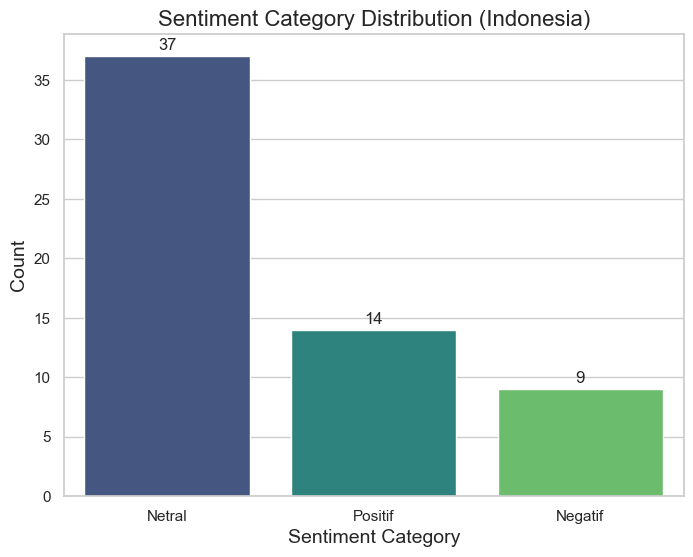

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the style of the plot using seaborn
sns.set(style="whitegrid")

# Create a bar plot
plt.figure(figsize=(8, 6))
sns.barplot(x=sentiment_counts1.index, y=sentiment_counts1.values, palette='viridis')

# Add labels and title
plt.title('Sentiment Category Distribution (Indonesia)', fontsize=16)
plt.xlabel('Sentiment Category', fontsize=14)
plt.ylabel('Count', fontsize=14)

# Display the values on top of the bars
for i in range(len(sentiment_counts1)):
    plt.text(i, sentiment_counts1.values[i] + 0.5, 
             sentiment_counts1.values[i], 
             ha='center', fontsize=12)

# Show the plot
plt.show()

#### Word Cloud (All and Based on Sentiment)

In [49]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


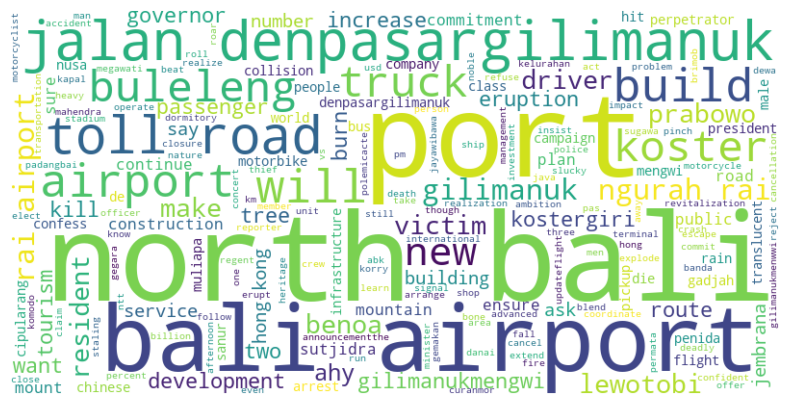

In [50]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Combine all text from the 'Churn_Reason' column into a single string
text = " ".join(cleaned_title_translated for cleaned_title_translated in data_sentiment1['cleaned_title_translated'])

# Create a word cloud
wordcloud_inggris = WordCloud(width=800, height=400, background_color='white').generate(text)

# Display the word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_inggris, interpolation='bilinear')
plt.axis('off')  # Remove axes
plt.show()

Based on Sentiment

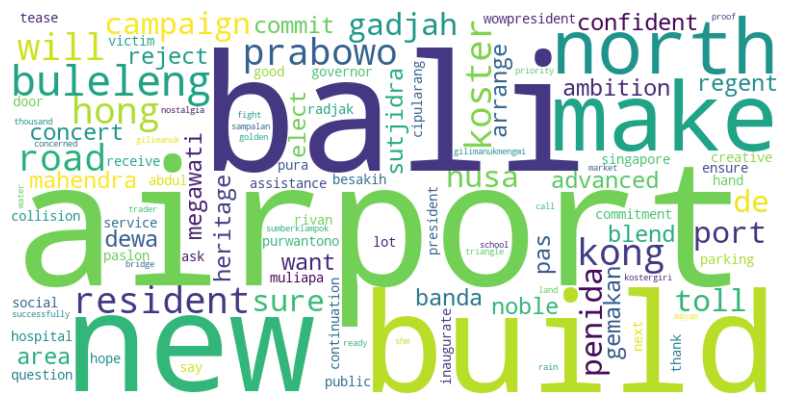

In [51]:
# Sentimen Positif
if data_sentiment1[data_sentiment1['sentiment_category_english'] == "Positif"].shape[0] != 0:
    data_sentiment1_positif = data_sentiment1[data_sentiment1['sentiment_category_english'] == "Positif"]

    text = " ".join(cleaned_title_translated for cleaned_title_translated in data_sentiment1_positif['cleaned_title_translated'])

    # Create a word cloud
    wordcloud_positif_inggris = WordCloud(width=800, height=400, background_color='white').generate(text)

    # Display the word cloud using matplotlib
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud_positif_inggris, interpolation='bilinear')
    plt.axis('off')  # Remove axes
    plt.show()
else:
    print("Tidak ada sentimen positif pada berita")

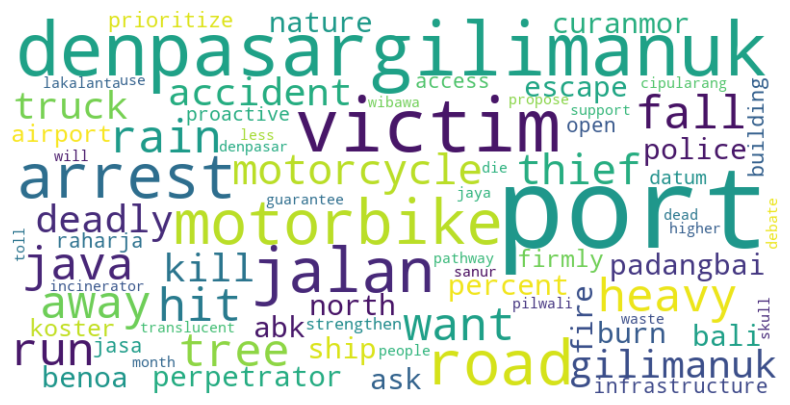

In [52]:
# Sentimen Negatif
if data_sentiment1[data_sentiment1['sentiment_category_english'] == "Negatif"].shape[0] != 0:
    data_sentiment1_negatif = data_sentiment1[data_sentiment1['sentiment_category_english'] == "Negatif"]

    text = " ".join(cleaned_title_translated for cleaned_title_translated in data_sentiment1_negatif['cleaned_title_translated'])

    # Create a word cloud
    wordcloud_negatif_inggris = WordCloud(width=800, height=400, background_color='white').generate(text)

    # Display the word cloud using matplotlib
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud_negatif_inggris, interpolation='bilinear')
    plt.axis('off')  # Remove axes
    plt.show()
else: print("Tidak ada sentimen negatif pada berita")

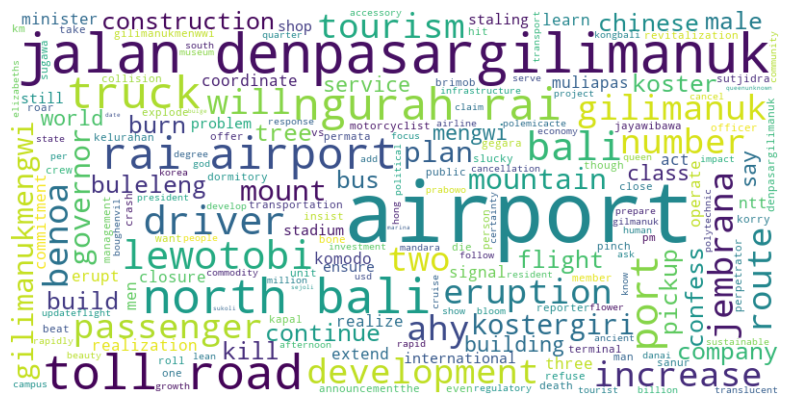

In [77]:
# Sentimen Netral
if data_sentiment1[data_sentiment1['sentiment_category_english'] == "Netral"].shape[0] != 0:
    data_sentiment1_netral = data_sentiment1[data_sentiment1['sentiment_category_english'] == "Netral"]

    text = " ".join(cleaned_title_translated for cleaned_title_translated in data_sentiment1_netral['cleaned_title_translated'])

    # Create a word cloud
    wordcloud_netral_inggris = WordCloud(width=800, height=400, background_color='white').generate(text)

    # Display the word cloud using matplotlib
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud_netral_inggris, interpolation='bilinear')
    plt.axis('off')  # Remove axes
    plt.show()
else: print("Tidak ada sentimen netral pada berita")

### 2. VADER

#### Sentiment

In [54]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\asus\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [55]:
import pandas as pd
from nltk.sentiment import SentimentIntensityAnalyzer

# Initialize VADER sentiment analyzer
sia = SentimentIntensityAnalyzer()

# Define a function to get sentiment scores with VADER
def get_sentiment_vader(text):
    # VADER provides a compound score which ranges from -1 (negative) to 1 (positive)
    score = sia.polarity_scores(text)['compound']
    return score

# Apply VADER to get the sentiment scores
data_sentiment1['sentiment_score_english_vader'] = data_sentiment1['cleaned_title_translated'].apply(get_sentiment_vader)

# Categorize sentiment with only 2 categories
def categorize_sentiment(score):
    if score > 0.05:  # Threshold for positive sentiment
        return 'Positif'
    elif score < -0.05:  # Threshold for negative sentiment
        return 'Negatif'
    else:
        return 'Netral'  # Scores between -0.05 and 0.05 considered neutral

data_sentiment1['sentiment_category_english_vader'] = data_sentiment1['sentiment_score_english_vader'].apply(categorize_sentiment)

C:\Users\asus\AppData\Local\Temp\ipykernel_20064\17249303.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_sentiment1['sentiment_score_english_vader'] = data_sentiment1['cleaned_title_translated'].apply(get_sentiment_vader)
C:\Users\asus\AppData\Local\Temp\ipykernel_20064\17249303.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_sentiment1['sentiment_category_english_vader'] = data_sentiment1['sentiment_score_english_vader'].apply(categorize_sentiment)


In [56]:
data_sentiment1.head()

keyword                                   title_translated  \
0  bandara  Mahendra Make sure North Bali Airport will be ...   
1  bandara  AHY Learns the Plan for the Development of Nor...   
2  bandara  Eruption of Men's Lewotobi Mountain, the closu...   
3  bandara  Signal The realization of North Bali Airport f...   
4  bandara  Mount Lewotobi erupted, three airports in NTT ...   

                            cleaned_title_translated  sentiment_score_english  \
0  mahendra make sure north bali airport will be ...                      0.5   
1  ahy learn the plan for the development of nort...                      0.0   
2  eruption of men lewotobi mountain the closure ...                      0.0   
3  signal the realization of north bali airport f...                      0.0   
4  mount lewotobi erupt three airport in ntt do n...                      0.0   

  sentiment_category_english  sentiment_score_english_vader  \
0                    Positif                         0.3182   
1                     Netral                         0.0000   
2                     Netral                         0.1779   
3                     Netral                         0.0000   
4                     Netral                         0.0000   

  sentiment_category_english_vader  
0                          Positif  
1                           Netral  
2                          Positif  
3                           Netral  
4                           Netral

In [57]:
sentiment_counts1_vader = data_sentiment1['sentiment_category_english_vader'].value_counts()
sentiment_counts1_vader

sentiment_category_english_vader
Positif    23
Netral     23
Negatif    14
Name: count, dtype: int64

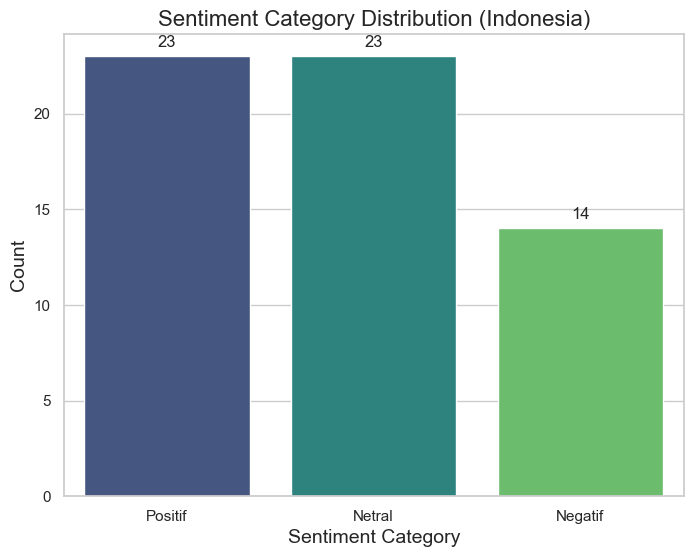

In [58]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the style of the plot using seaborn
sns.set(style="whitegrid")

# Create a bar plot
plt.figure(figsize=(8, 6))
sns.barplot(x=sentiment_counts1_vader.index, y=sentiment_counts1_vader.values, palette='viridis')

# Add labels and title
plt.title('Sentiment Category Distribution (Indonesia)', fontsize=16)
plt.xlabel('Sentiment Category', fontsize=14)
plt.ylabel('Count', fontsize=14)

# Display the values on top of the bars
for i in range(len(sentiment_counts1_vader)):
    plt.text(i, sentiment_counts1_vader.values[i] + 0.5, 
             sentiment_counts1_vader.values[i], 
             ha='center', fontsize=12)

# Show the plot
plt.show()

#### Word Cloud (Based on Sentiment Only)

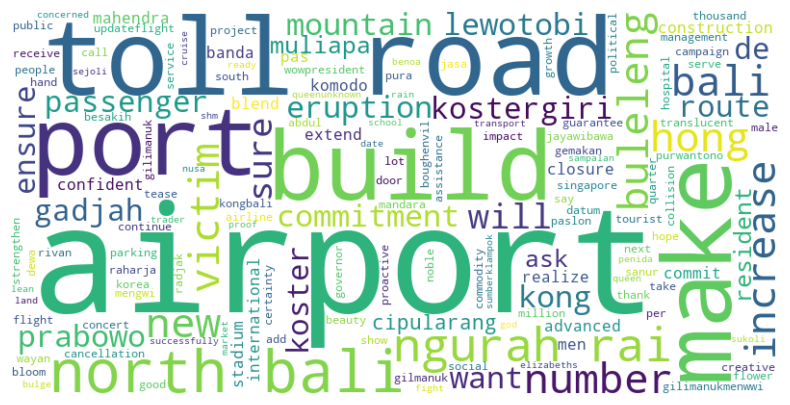

In [59]:
# Sentimen Positif
if data_sentiment1[data_sentiment1['sentiment_category_english_vader'] == "Positif"].shape[0] != 0:
    data_sentiment1_positif_vader = data_sentiment1[data_sentiment1['sentiment_category_english_vader'] == "Positif"]

    text = " ".join(cleaned_title_translated for cleaned_title_translated in data_sentiment1_positif_vader['cleaned_title_translated'])

    # Create a word cloud
    wordcloud_positif_inggris_vader = WordCloud(width=800, height=400, background_color='white').generate(text)

    # Display the word cloud using matplotlib
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud_positif_inggris_vader, interpolation='bilinear')
    plt.axis('off')  # Remove axes
    plt.show()
else: print("Tidak ada sentimen positif pada berita")

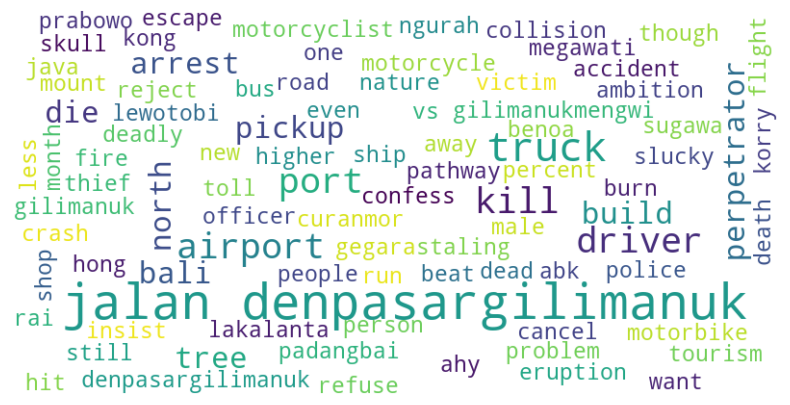

In [60]:
# Sentimen Negatif
if data_sentiment1[data_sentiment1['sentiment_category_english_vader'] == "Negatif"].shape[0] != 0:
    data_sentiment1_negatif_vader = data_sentiment1[data_sentiment1['sentiment_category_english_vader'] == "Negatif"]

    text = " ".join(cleaned_title_translated for cleaned_title_translated in data_sentiment1_negatif_vader['cleaned_title_translated'])

    # Create a word cloud
    wordcloud_negatif_inggris_vader = WordCloud(width=800, height=400, background_color='white').generate(text)

    # Display the word cloud using matplotlib
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud_negatif_inggris_vader, interpolation='bilinear')
    plt.axis('off')  # Remove axes
    plt.show()
else: print("Tidak ada sentimen negatif pada berita")

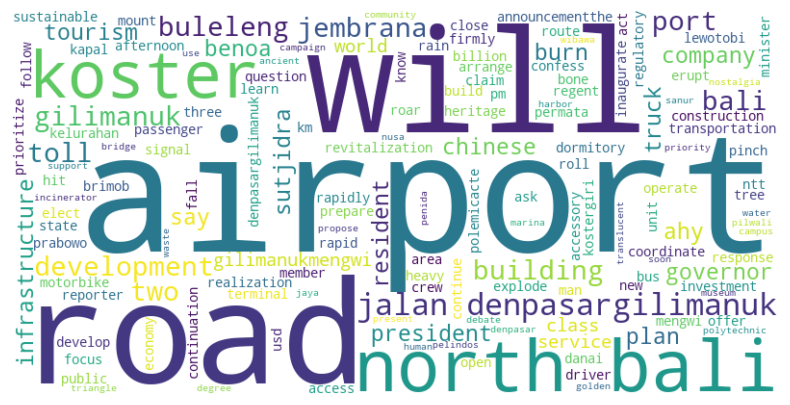

In [61]:
# Sentimen Netral
if data_sentiment1[data_sentiment1['sentiment_category_english_vader'] == "Netral"].shape[0] != 0:
    data_sentiment1_netral_vader = data_sentiment1[data_sentiment1['sentiment_category_english_vader'] == "Netral"]

    text = " ".join(cleaned_title_translated for cleaned_title_translated in data_sentiment1_netral_vader['cleaned_title_translated'])

    # Create a word cloud
    wordcloud_netral_inggris_vader = WordCloud(width=800, height=400, background_color='white').generate(text)

    # Display the word cloud using matplotlib
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud_netral_inggris_vader, interpolation='bilinear')
    plt.axis('off')  # Remove axes
    plt.show()
else: print("Tidak ada sentimen netral pada berita")

### 3. IndoBERT

#### Sentiment

In [62]:
pip install transforms torch

Note: you may need to restart the kernel to use updated packages.


In [63]:
data_sentiment2 = data_ready[['keyword','title','cleaned_title','content']]
data_sentiment2

keyword                                              title  \
0     bandara  Mahendra Pastikan Bandara Bali Utara Jadi Diba...   
1     bandara  AHY Pelajari Rencana Pembangunan Bandara Bali ...   
2     bandara  Erupsi Gunung Lewotobi Laki-laki, Penutupan Ba...   
3     bandara  Sinyal Terwujudnya Bandara Bali Utara dari Men...   
4     bandara  Gunung Lewotobi Meletus, Tiga Bandara di NTT T...   
5     bandara  Prabowo Berkomitmen Bangun Bandara Buleleng, I...   
6     bandara  PAS Yakin Bandara Bali Utara Bisa Bikin Bulele...   
7     bandara  Ambisi Prabowo Bangun Bandara Bali Utara yang ...   
8     bandara  Mulia-PAS Komitmen Realisasikan Bandara Bali U...   
9         tol  AHY Masih Belanja Masalah soal Mangkraknya Tol...   
10        tol  Koster-Giri Pastikan Pembangunan Tol Gilimanuk...   
11   terminal  Sutjidra Tawarkan Revitalisasi Terminal-Subsid...   
12  gilimanuk  Truk Tabrak Pohon-Terguling di Jalan Denpasar-...   
13  gilimanuk  Tabrak Bus Pariwisata, Sopir Pikap Tewas di Ja...   
14  gilimanuk          Dua Unit Asrama Brimob Gilimanuk Terbakar   
15  gilimanuk  Ngaku Wartawan, Dua Pria Keroyok Sopir Truk di...   
16  gilimanuk  Pengendara Motor Tewas Tertimpa Pohon di Jalan...   
17  gilimanuk  Hujan Deras, Pemotor Tabrak Pohon Tumbang di J...   
18  gilimanuk  Truk Terguling di Jalan Denpasar-Gilimanuk, Pe...   
19  gilimanuk  Bus Pariwisata Hangus Terbakar di Jalan Denpas...   
20  gilimanuk  Hendak Kabur ke Jawa, 2 Pencuri Motor Diringku...   
21  gilimanuk  Tabrakan Maut Pikap Vs Truk di Jalan Denpasar-...   
22  gilimanuk  Sopir Truk Dikeroyok di Jalan Denpasar-Giliman...   
23  gilimanuk  Kecelakaan Maut di Jalan Denpasar-Gilimanuk, P...   
24  gilimanuk  Pengumuman! Jalur Denpasar-Gilimanuk di Kelura...   
25  pelabuhan  Pelaku Curanmor Ditangkap Polisi Saat Hendak K...   
26  pelabuhan  ABK Korban Kebakaran Kapal di Pelabuhan Benoa ...   
27  pelabuhan  Sutjidra Akan Tata Kawasan Heritage-Pelabuhan ...   
28  pelabuhan  KM Permata 168 Meledak di Pelabuhan Benoa, Dua...   
29  pelabuhan  Jaya-Wibawa Ingin Ambil Alih Pengelolaan Pelab...   
30  pelabuhan  Sugawa Korry Ngotot Bandara Bali Utara Harus D...   
31    bandara  UPDATE! Pembatalan Penerbangan  di Bandara Ngu...   
32    bandara  POLEMIK! Pj Gubernur Bali Klaim Tidak Tahu Per...   
33    bandara  Ikut Biayai Pembangunan Bandara Bali Utara, Pe...   
34    bandara  Konser Kampanye Dewa 19 untuk Mulia- PAS di Bu...   
35    bandara  Gunung Lewotobi Laki Laki Erupsi,  6 Penerbang...   
36    bandara  Koster Respon Cepat Rencana Presiden Prabowo B...   
37    bandara  Wow! Presiden Prabowo Komitmen Bangun Bandara ...   
38    bandara  Ditanya Soal Bandara Bali Utara, Koster Tegas ...   
39    bandara  Bandara Ngurah Rai Tambah Rute Penerbangan ke ...   
40    bandara  Penumpang di Bandara Ngurah Rai Tembus 17,98 J...   
41    bandara  Berkat Tangan Kreatif Koster, Parkiran Pura Ag...   
42    bandara  Mulia-PAS Pastikan Bandara Ada di Buleleng, So...   
43    bandara  Jumlah Maskapai  Layani Rute Hongkong-Bali di ...   
44        tol  Jangan Jadi Komoditas Politik, Warga Minta Kep...   
45        tol  Rivan A. Purwantono Pastikan Korban Tabrakan B...   
46        tol  Fokus Pembangunan Berkelanjutan di Jembrana, K...   
47        tol  Jasa Raharja Proaktif Data Korban Tabrakan Ber...   
48        tol  Presiden Baru Kelar Dilantik,Warga Pertanyakan...   
49        tol  Indahnya Bunga Bugenvil Bermekaran di Jalan To...   
50        tol  Koster-Giri Lanjut Bangun Tol Gilimanuk-Mengwi...   
51  gilimanuk  Ribuan Warga Gilimanuk "Memanggil" Wayan Koste...   
52  gilimanuk  Lakalantas Maut Denpasar-Gilimanuk Tinggi, Kur...   
53  gilimanuk  Politeknik Negeri Bali Kampus Jembrana Gelar P...   
54  pelabuhan  Kapal Pesiar Queen Elizabeth Bersandar di Pela...   
55  pelabuhan  Dewa Ratu! Orang Tak Dikenal Tusuk Sejoli Seda...   
56  pelabuhan  Dari Debat Pilwali 2024: Jaya-Wibawa Akan Usul...   
57  pelabuhan  Prihatin Pedagang Kehujanan, Koster-Giri Siap .

In [64]:
from transformers import BertForSequenceClassification, BertTokenizer
import torch

# Load the saved model and tokenizer
model_load_path = "C:/Users/asus/OneDrive/BPS/Neraca/smsa_bpsbali_indobert_model"  # The path where the model is saved
tokenizer_load_path = "C:/Users/asus/OneDrive/BPS/Neraca/smsa_bpsbali_indobert_tokenizer"  # The path where the tokenizer is saved

# Load the model and tokenizer
model = BertForSequenceClassification.from_pretrained(model_load_path)
tokenizer = BertTokenizer.from_pretrained(tokenizer_load_path)

In [65]:
from torch.nn.functional import softmax  # Softmax function to convert logits to probabilities

# Initialize an empty list to collect predictions
sentiment_predict = []
probabilities = []

# Loop through the cleaned titles
for text in data_sentiment2['cleaned_title']:
    # Tokenize the input text
    inputs = tokenizer(text, return_tensors="pt", padding=True, truncation=True, max_length=512)

    # Make prediction
    model.eval()  # Set model to evaluation mode
    with torch.no_grad():  # Disable gradients for inference
        outputs = model(**inputs)

    # Get the logits (raw scores)
    logits = outputs.logits
    
    # Apply softmax to convert logits to probabilities
    probs = softmax(logits, dim=-1)  # Softmax along the class dimension (last dimension)

    # Get the predicted class (index of max logit)
    predicted_class = logits.argmax(dim=-1).item()

    # Get the probability of the predicted class
    predicted_prob = probs[0, predicted_class].item()

    # Convert prediction to string label
    if predicted_class == 0:
        sentiment_label = "positif"
    elif predicted_class == 1:
        sentiment_label = "netral"
    else:
        sentiment_label = "negatif"

    # Append the sentiment label and its probability
    sentiment_predict.append(sentiment_label)
    probabilities.append(predicted_prob)

# After the loop, create the DataFrame
sentiment_predict_df = pd.DataFrame({
    'sentiment': sentiment_predict,
    'probability': probabilities
})

# Add it as a new column to the original DataFrame
data_sentiment2['sentiment_score_indonesia'] = sentiment_predict_df['probability']
data_sentiment2['sentiment_category_indonesia'] = sentiment_predict_df['sentiment']

# Optionally, you can print the DataFrame to check the results
data_sentiment2


C:\Users\asus\AppData\Local\Temp\ipykernel_20064\1096017218.py:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_sentiment2['sentiment_score_indonesia'] = sentiment_predict_df['probability']
C:\Users\asus\AppData\Local\Temp\ipykernel_20064\1096017218.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_sentiment2['sentiment_category_indonesia'] = sentiment_predict_df['sentiment']


keyword                                              title  \
0     bandara  Mahendra Pastikan Bandara Bali Utara Jadi Diba...   
1     bandara  AHY Pelajari Rencana Pembangunan Bandara Bali ...   
2     bandara  Erupsi Gunung Lewotobi Laki-laki, Penutupan Ba...   
3     bandara  Sinyal Terwujudnya Bandara Bali Utara dari Men...   
4     bandara  Gunung Lewotobi Meletus, Tiga Bandara di NTT T...   
5     bandara  Prabowo Berkomitmen Bangun Bandara Buleleng, I...   
6     bandara  PAS Yakin Bandara Bali Utara Bisa Bikin Bulele...   
7     bandara  Ambisi Prabowo Bangun Bandara Bali Utara yang ...   
8     bandara  Mulia-PAS Komitmen Realisasikan Bandara Bali U...   
9         tol  AHY Masih Belanja Masalah soal Mangkraknya Tol...   
10        tol  Koster-Giri Pastikan Pembangunan Tol Gilimanuk...   
11   terminal  Sutjidra Tawarkan Revitalisasi Terminal-Subsid...   
12  gilimanuk  Truk Tabrak Pohon-Terguling di Jalan Denpasar-...   
13  gilimanuk  Tabrak Bus Pariwisata, Sopir Pikap Tewas di Ja...   
14  gilimanuk          Dua Unit Asrama Brimob Gilimanuk Terbakar   
15  gilimanuk  Ngaku Wartawan, Dua Pria Keroyok Sopir Truk di...   
16  gilimanuk  Pengendara Motor Tewas Tertimpa Pohon di Jalan...   
17  gilimanuk  Hujan Deras, Pemotor Tabrak Pohon Tumbang di J...   
18  gilimanuk  Truk Terguling di Jalan Denpasar-Gilimanuk, Pe...   
19  gilimanuk  Bus Pariwisata Hangus Terbakar di Jalan Denpas...   
20  gilimanuk  Hendak Kabur ke Jawa, 2 Pencuri Motor Diringku...   
21  gilimanuk  Tabrakan Maut Pikap Vs Truk di Jalan Denpasar-...   
22  gilimanuk  Sopir Truk Dikeroyok di Jalan Denpasar-Giliman...   
23  gilimanuk  Kecelakaan Maut di Jalan Denpasar-Gilimanuk, P...   
24  gilimanuk  Pengumuman! Jalur Denpasar-Gilimanuk di Kelura...   
25  pelabuhan  Pelaku Curanmor Ditangkap Polisi Saat Hendak K...   
26  pelabuhan  ABK Korban Kebakaran Kapal di Pelabuhan Benoa ...   
27  pelabuhan  Sutjidra Akan Tata Kawasan Heritage-Pelabuhan ...   
28  pelabuhan  KM Permata 168 Meledak di Pelabuhan Benoa, Dua...   
29  pelabuhan  Jaya-Wibawa Ingin Ambil Alih Pengelolaan Pelab...   
30  pelabuhan  Sugawa Korry Ngotot Bandara Bali Utara Harus D...   
31    bandara  UPDATE! Pembatalan Penerbangan  di Bandara Ngu...   
32    bandara  POLEMIK! Pj Gubernur Bali Klaim Tidak Tahu Per...   
33    bandara  Ikut Biayai Pembangunan Bandara Bali Utara, Pe...   
34    bandara  Konser Kampanye Dewa 19 untuk Mulia- PAS di Bu...   
35    bandara  Gunung Lewotobi Laki Laki Erupsi,  6 Penerbang...   
36    bandara  Koster Respon Cepat Rencana Presiden Prabowo B...   
37    bandara  Wow! Presiden Prabowo Komitmen Bangun Bandara ...   
38    bandara  Ditanya Soal Bandara Bali Utara, Koster Tegas ...   
39    bandara  Bandara Ngurah Rai Tambah Rute Penerbangan ke ...   
40    bandara  Penumpang di Bandara Ngurah Rai Tembus 17,98 J...   
41    bandara  Berkat Tangan Kreatif Koster, Parkiran Pura Ag...   
42    bandara  Mulia-PAS Pastikan Bandara Ada di Buleleng, So...   
43    bandara  Jumlah Maskapai  Layani Rute Hongkong-Bali di ...   
44        tol  Jangan Jadi Komoditas Politik, Warga Minta Kep...   
45        tol  Rivan A. Purwantono Pastikan Korban Tabrakan B...   
46        tol  Fokus Pembangunan Berkelanjutan di Jembrana, K...   
47        tol  Jasa Raharja Proaktif Data Korban Tabrakan Ber...   
48        tol  Presiden Baru Kelar Dilantik,Warga Pertanyakan...   
49        tol  Indahnya Bunga Bugenvil Bermekaran di Jalan To...   
50        tol  Koster-Giri Lanjut Bangun Tol Gilimanuk-Mengwi...   
51  gilimanuk  Ribuan Warga Gilimanuk "Memanggil" Wayan Koste...   
52  gilimanuk  Lakalantas Maut Denpasar-Gilimanuk Tinggi, Kur...   
53  gilimanuk  Politeknik Negeri Bali Kampus Jembrana Gelar P...   
54  pelabuhan  Kapal Pesiar Queen Elizabeth Bersandar di Pela...   
55  pelabuhan  Dewa Ratu! Orang Tak Dikenal Tusuk Sejoli Seda...   
56  pelabuhan  Dari Debat Pilwali 2024: Jaya-Wibawa Akan Usul...   
57  pelabuhan  Prihatin Pedagang Kehujanan, Koster-Giri Siap .

In [66]:
sentiment_counts2 = data_sentiment2['sentiment_category_indonesia'].value_counts()
sentiment_counts2

sentiment_category_indonesia
netral     55
positif     5
Name: count, dtype: int64

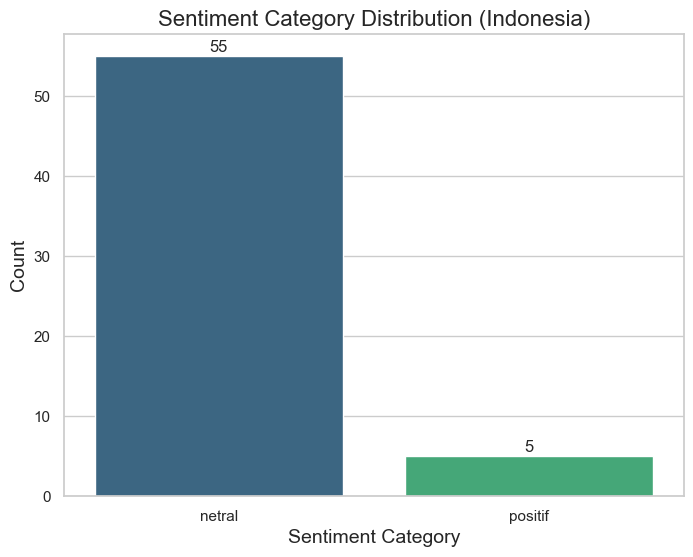

In [67]:
import seaborn as sns

# Set the style of the plot using seaborn
sns.set(style="whitegrid")

# Create a bar plot
plt.figure(figsize=(8, 6))
sns.barplot(x=sentiment_counts2.index, y=sentiment_counts2.values, palette='viridis')

# Add labels and title
plt.title('Sentiment Category Distribution (Indonesia)', fontsize=16)
plt.xlabel('Sentiment Category', fontsize=14)
plt.ylabel('Count', fontsize=14)

# Display the values on top of the bars
for i in range(len(sentiment_counts2)):
    plt.text(i, sentiment_counts2.values[i] + 0.5, 
             sentiment_counts2.values[i], 
             ha='center', fontsize=12)

# Show the plot
plt.show()

#### Word Cloud (All and Based on Sentiment)

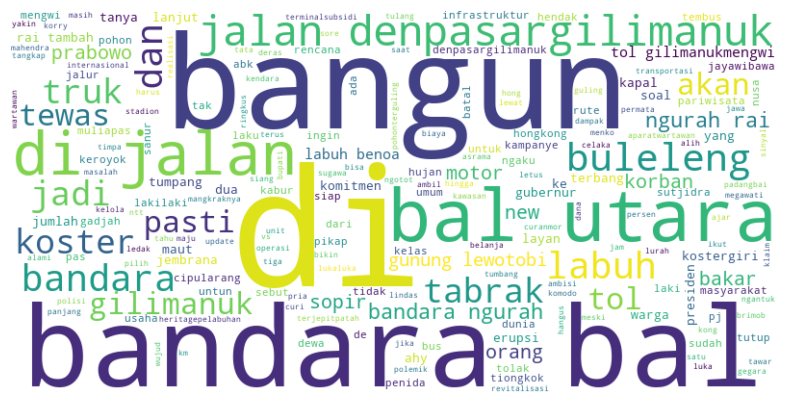

In [68]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Combine all text from the 'Churn_Reason' column into a single string
text = " ".join(cleaned_title for cleaned_title in data_sentiment2['cleaned_title'])

# Create a word cloud
wordcloud_indonesia = WordCloud(width=800, height=400, background_color='white').generate(text)

# Display the word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_indonesia, interpolation='bilinear')
plt.axis('off')  # Remove axes
plt.show()

Based on Sentiment

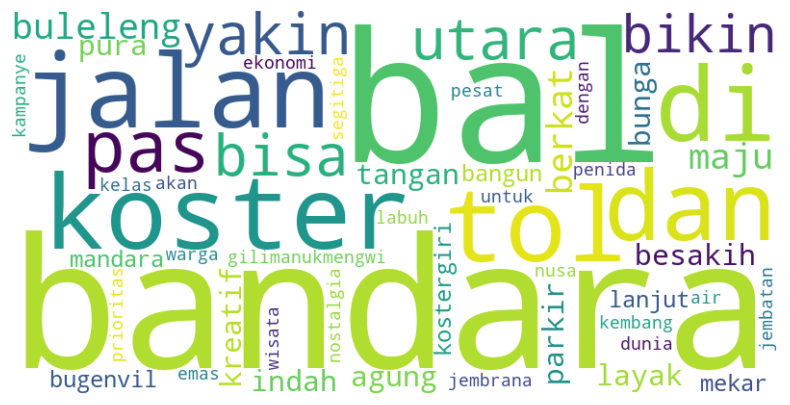

In [69]:
# Sentimen Positif
if data_sentiment2[data_sentiment2['sentiment_category_indonesia'] == "positif"].shape[0] != 0:
    data_sentiment2_positif = data_sentiment2[data_sentiment2['sentiment_category_indonesia'] == "positif"]

    text = " ".join(cleaned_title for cleaned_title in data_sentiment2_positif['cleaned_title'])

    # Create a word cloud
    wordcloud_positif_indonesia = WordCloud(width=800, height=400, background_color='white').generate(text)

    # Display the word cloud using matplotlib
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud_positif_indonesia, interpolation='bilinear')
    plt.axis('off')  # Remove axes
    plt.show()
else: print("Tidak ada sentimen positif pada berita")

In [70]:
# Sentimen Negatif
if data_sentiment2[data_sentiment2['sentiment_category_indonesia'] == "negatif"].shape[0] != 0:
    data_sentiment2_negatif = data_sentiment2[data_sentiment2['sentiment_category_indonesia'] == "negatif"]

    text = " ".join(cleaned_title for cleaned_title in data_sentiment2_negatif['cleaned_title'])

    # Create a word cloud
    wordcloud_negatif_indonesia = WordCloud(width=800, height=400, background_color='white').generate(text)

    # Display the word cloud using matplotlib
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud_negatif_indonesia, interpolation='bilinear')
    plt.axis('off')  # Remove axes
    plt.show()
else: print("Tidak ada sentimen negatif pada berita")

Tidak ada sentimen negatif pada berita


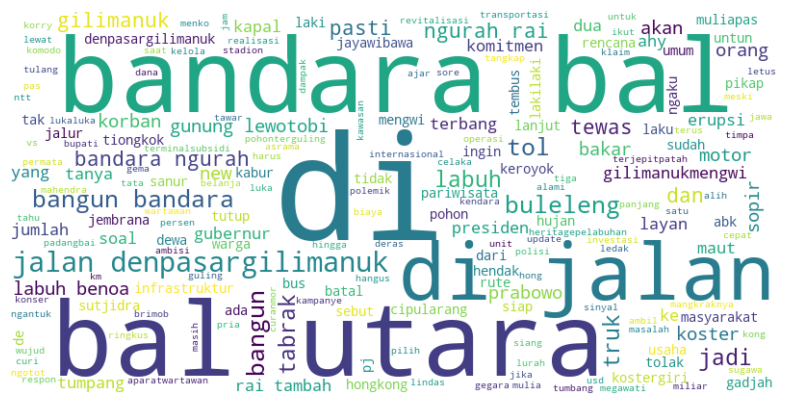

In [71]:
# Sentimen Netral
if data_sentiment2[data_sentiment2['sentiment_category_indonesia'] == "netral"].shape[0] != 0:
    data_sentiment2_netral = data_sentiment2[data_sentiment2['sentiment_category_indonesia'] == "netral"]

    text = " ".join(cleaned_title for cleaned_title in data_sentiment2_netral['cleaned_title'])

    # Create a word cloud
    wordcloud_netral_indonesia = WordCloud(width=800, height=400, background_color='white').generate(text)

    # Display the word cloud using matplotlib
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud_netral_indonesia, interpolation='bilinear')
    plt.axis('off')  # Remove axes
    plt.show()
else: print("Tidak ada sentimen netral pada berita")

### Export Result

In [72]:
print(data_sentiment1.shape)
data_sentiment1.head()

(60, 7)


keyword                                   title_translated  \
0  bandara  Mahendra Make sure North Bali Airport will be ...   
1  bandara  AHY Learns the Plan for the Development of Nor...   
2  bandara  Eruption of Men's Lewotobi Mountain, the closu...   
3  bandara  Signal The realization of North Bali Airport f...   
4  bandara  Mount Lewotobi erupted, three airports in NTT ...   

                            cleaned_title_translated  sentiment_score_english  \
0  mahendra make sure north bali airport will be ...                      0.5   
1  ahy learn the plan for the development of nort...                      0.0   
2  eruption of men lewotobi mountain the closure ...                      0.0   
3  signal the realization of north bali airport f...                      0.0   
4  mount lewotobi erupt three airport in ntt do n...                      0.0   

  sentiment_category_english  sentiment_score_english_vader  \
0                    Positif                         0.3182   
1                     Netral                         0.0000   
2                     Netral                         0.1779   
3                     Netral                         0.0000   
4                     Netral                         0.0000   

  sentiment_category_english_vader  
0                          Positif  
1                           Netral  
2                          Positif  
3                           Netral  
4                           Netral

In [73]:
print(data_sentiment2.shape)
data_sentiment2.head()

(60, 6)


keyword                                              title  \
0  bandara  Mahendra Pastikan Bandara Bali Utara Jadi Diba...   
1  bandara  AHY Pelajari Rencana Pembangunan Bandara Bali ...   
2  bandara  Erupsi Gunung Lewotobi Laki-laki, Penutupan Ba...   
3  bandara  Sinyal Terwujudnya Bandara Bali Utara dari Men...   
4  bandara  Gunung Lewotobi Meletus, Tiga Bandara di NTT T...   

                                       cleaned_title  \
0       mahendra pasti bandara bal utara jadi bangun   
1          ahy ajar rencana bangun bandara bal utara   
2  erupsi gunung lewotobi lakilaki tutup bandara ...   
3  sinyal wujud bandara bal utara dari menko ahy ...   
4  gunung lewotobi letus tiga bandara di ntt tak ...   

                                             content  \
0  Penjabat (Pj) Gubernur Bali Sang Made Mahendra...   
1  Menteri Koordinator Bidang Infrastruktur dan P...   
2  Penutupan Bandara Internasional Komodo di Labu...   
3  Wacana proyek pembangunan Bandara Bali Utara y...   
4  Tiga bandara tak beroperasi akibat meletusnya ...   

   sentiment_score_indonesia sentiment_category_indonesia  
0                   0.656138                       netral  
1                   0.996584                       netral  
2                   0.995952                       netral  
3                   0.995698                       netral  
4                   0.994301                       netral

In [74]:
# Assigning columns individually
sentiment_result = data_sentiment2.copy()  # Copy data_sentiment2 to avoid modifying the original

# Assign columns from data_sentiment1 to sentiment_result
sentiment_result['title_translated'] = data_sentiment1['title_translated']
sentiment_result['cleaned_title_translated'] = data_sentiment1['cleaned_title_translated']
sentiment_result['sentiment_category_english'] = data_sentiment1['sentiment_category_english']
sentiment_result['sentiment_score_english'] = data_sentiment1['sentiment_score_english']
sentiment_result['sentiment_category_english_vader'] = data_sentiment1['sentiment_category_english_vader']
sentiment_result['sentiment_score_english_vader'] = data_sentiment1['sentiment_score_english_vader']

print(sentiment_result.shape)
sentiment_result.head()

(60, 12)


keyword                                              title  \
0  bandara  Mahendra Pastikan Bandara Bali Utara Jadi Diba...   
1  bandara  AHY Pelajari Rencana Pembangunan Bandara Bali ...   
2  bandara  Erupsi Gunung Lewotobi Laki-laki, Penutupan Ba...   
3  bandara  Sinyal Terwujudnya Bandara Bali Utara dari Men...   
4  bandara  Gunung Lewotobi Meletus, Tiga Bandara di NTT T...   

                                       cleaned_title  \
0       mahendra pasti bandara bal utara jadi bangun   
1          ahy ajar rencana bangun bandara bal utara   
2  erupsi gunung lewotobi lakilaki tutup bandara ...   
3  sinyal wujud bandara bal utara dari menko ahy ...   
4  gunung lewotobi letus tiga bandara di ntt tak ...   

                                             content  \
0  Penjabat (Pj) Gubernur Bali Sang Made Mahendra...   
1  Menteri Koordinator Bidang Infrastruktur dan P...   
2  Penutupan Bandara Internasional Komodo di Labu...   
3  Wacana proyek pembangunan Bandara Bali Utara y...   
4  Tiga bandara tak beroperasi akibat meletusnya ...   

   sentiment_score_indonesia sentiment_category_indonesia  \
0                   0.656138                       netral   
1                   0.996584                       netral   
2                   0.995952                       netral   
3                   0.995698                       netral   
4                   0.994301                       netral   

                                    title_translated  \
0  Mahendra Make sure North Bali Airport will be ...   
1  AHY Learns the Plan for the Development of Nor...   
2  Eruption of Men's Lewotobi Mountain, the closu...   
3  Signal The realization of North Bali Airport f...   
4  Mount Lewotobi erupted, three airports in NTT ...   

                            cleaned_title_translated  \
0  mahendra make sure north bali airport will be ...   
1  ahy learn the plan for the development of nort...   
2  eruption of men lewotobi mountain the closure ...   
3  signal the realization of north bali airport f...   
4  mount lewotobi erupt three airport in ntt do n...   

  sentiment_category_english  sentiment_score_english  \
0                    Positif                      0.5   
1                     Netral                      0.0   
2                     Netral                      0.0   
3                     Netral                      0.0   
4                     Netral                      0.0   

  sentiment_category_english_vader  sentiment_score_english_vader  
0                          Positif                         0.3182  
1                           Netral                         0.0000  
2                          Positif                         0.1779  
3                           Netral                         0.0000  
4                           Netral                         0.0000

In [75]:
sentiment_result.to_excel("C:/Users/asus/OneDrive/BPS/Neraca/sentimentresult_sektor8_triwulan4_bali.xlsx")